<a href="https://colab.research.google.com/github/Sachinvt/Sachinvt/blob/main/ML_Classification_Health_Insurance_Cross_Sell_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Health Insurance Cross Sell Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Sachin Thorat

# **Project Summary -**

The insurance industry relies on understanding and managing risk. One way insurance companies do this is by assessing whether their existing health insurance policyholders may also be interested in purchasing vehicle insurance. To optimize their business model and revenue, an insurance company wants to predict customer interest in vehicle insurance based on various customer demographics and policy-related factors.

Insurance policies are essentially agreements in which a customer pays a premium to an insurance company in exchange for a guarantee of compensation in the event of specified loss, damage, illness, or death. For example, a health insurance customer pays an annual premium, and in return, the insurance company agrees to cover medical expenses up to a certain amount. The key to how insurance companies can afford to do this lies in the concept of probabilities and risk sharing among policyholders. Not every policyholder will make a claim in a given year, and by pooling premiums from many customers, the insurance company can manage the financial risk.

In this context, the challenge is to build a predictive model to determine whether existing health insurance policyholders would also be interested in purchasing vehicle insurance. Such a model would help the company tailor its communication strategies to reach out to potential customers and optimize its revenue.

The information available for building this predictive model includes:

**Demographics:** This includes information about the customer's gender, age, and region code type. Demographics can be crucial in understanding customer behavior and preferences.

**Vehicle Details:** The age of the customer's vehicle and whether it has been damaged or not are essential factors to consider. Newer vehicles might be more appealing for insurance coverage, and the condition of the vehicle affects the risk.

**Policy Information:** This covers details such as the premium amount the customer pays and the sourcing channel through which they obtained the insurance. Premiums and the way policies are sourced can impact a customer's likelihood to consider additional insurance.

By analyzing and leveraging this data, the insurance company can create a predictive model that identifies patterns and relationships between these factors and a customer's interest in vehicle insurance. Machine learning and data analytics can be powerful tools for this task, enabling the company to:

**Segment Customers:** The model can group policyholders into segments based on their likelihood to be interested in vehicle insurance. For example, it may identify a group of customers with a high probability of interest.

**Tailor Marketing Strategies:** Once customer segments are defined, the insurance company can design and implement targeted marketing and communication strategies for each segment. This ensures that efforts and resources are directed where they are most likely to yield positive results.

**Optimize Revenue:** By successfully identifying potential customers for vehicle insurance, the company can increase its revenue by expanding its customer base and offering additional policies to interested policyholders.

In conclusion, building a predictive model to determine customer interest in vehicle insurance is a valuable strategic initiative for the insurance company. It allows them to leverage their existing customer base, improve customer satisfaction, and grow their business. Using data-driven insights, the company can make informed decisions and tailor their approach to each customer, ultimately benefitting both the company and its policyholders.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


An insurance company, is seeking to enhance its business model and revenue by predicting customer interest in vehicle insurance among their existing health insurance policyholders. The client wants to develop a predictive model that will enable them to identify which policyholders are likely to consider purchasing vehicle insurance. To do this, the client has provided us with demographic information, vehicle details, and policy-related data for each customer. The objective is to leverage this information to create a predictive model that can segment policyholders and inform targeted marketing and communication strategies. Ultimately, the goal is to optimize revenue and increase customer engagement by offering relevant insurance products to interested policyholders.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [388]:
# Import Libraries
#importing required libraries
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Hyperparamter Tuning
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from lightgbm import LGBMClassifier, reset_parameter
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import fbeta_score, make_scorer

#import warnings
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [389]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [390]:
df=pd.read_csv('/content/drive/MyDrive/Classification/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

### Dataset First View

In [391]:
# Dataset First Look
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Dataset Rows & Columns count

In [392]:
# Dataset Rows & Columns count
df.shape

(381109, 12)

### Dataset Information

In [393]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [394]:
# Dataset Duplicate Value Count
df.duplicated().value_counts()

False    381109
dtype: int64

#### Missing Values/Null Values

In [395]:
# Missing Values/Null Values Count
Missing_value = df.isnull().sum()

In [396]:
# Visualizing the missing values
print(Missing_value)

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


### What did you know about your dataset?

This data includes information about the customer's gender, age, and region code type. Demographics can be crucial in understanding customer behavior and preferences. Data consist of total rows 381109 and 12 columns. Given data has no any missing and duplicate values.

## ***2. Understanding Your Variables***

In [397]:
# Dataset Columns
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [398]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


### Variables Description

**id:** Unique ID for the customer

**Gender:** Gender of the customer

**Age:** Age of the customer

**Driving_License:** 0 : Customer does not have DL, 1 : Customer already has DL

**Region_Code:** Unique code for the region of the customer

**Previously_Insured:** 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

**Vehicle_Age:** Age of the Vehicle

**Vehicle_Damage:**1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

**Annual_Premium:** The amount customer needs to pay as premium in the year

**PolicySalesChannel:** Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

**Vintage:** Number of Days, Customer has been associated with the company

**Response:** 1 : Customer is interested, 0 : Customer is not interested

### Check Unique Values for each variable.

In [399]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique())

No. of unique values in  id is 381109
No. of unique values in  Gender is 2
No. of unique values in  Age is 66
No. of unique values in  Driving_License is 2
No. of unique values in  Region_Code is 53
No. of unique values in  Previously_Insured is 2
No. of unique values in  Vehicle_Age is 3
No. of unique values in  Vehicle_Damage is 2
No. of unique values in  Annual_Premium is 48838
No. of unique values in  Policy_Sales_Channel is 155
No. of unique values in  Vintage is 290
No. of unique values in  Response is 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [400]:
# Write your code to make your dataset analysis ready.
# Remove duplicates
df = df.drop_duplicates()

### What all manipulations have you done and insights you found?

In given data there is no missing and duplicate values present. So no need to do deal with it. There are total 3 categorical variables and remaining are numerical variables present in this dataset.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# **Chart - 1 Response Variable class imbalance check**

<Axes: xlabel='Response', ylabel='count'>

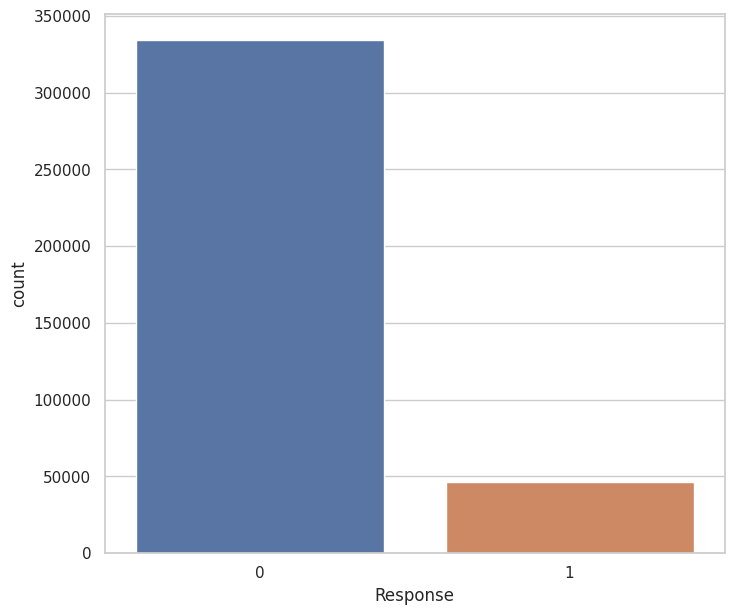

In [401]:
# Chart - 1 visualization code
#Dependent variable 'Response'
plt.figure(figsize=(8,7))
sns.set_theme(style='whitegrid')
sns.countplot(x=df['Response'],data=df)

From above graph it is depicts that target variable has data imbalanced.

# **Chart - 2 Agewise Response**



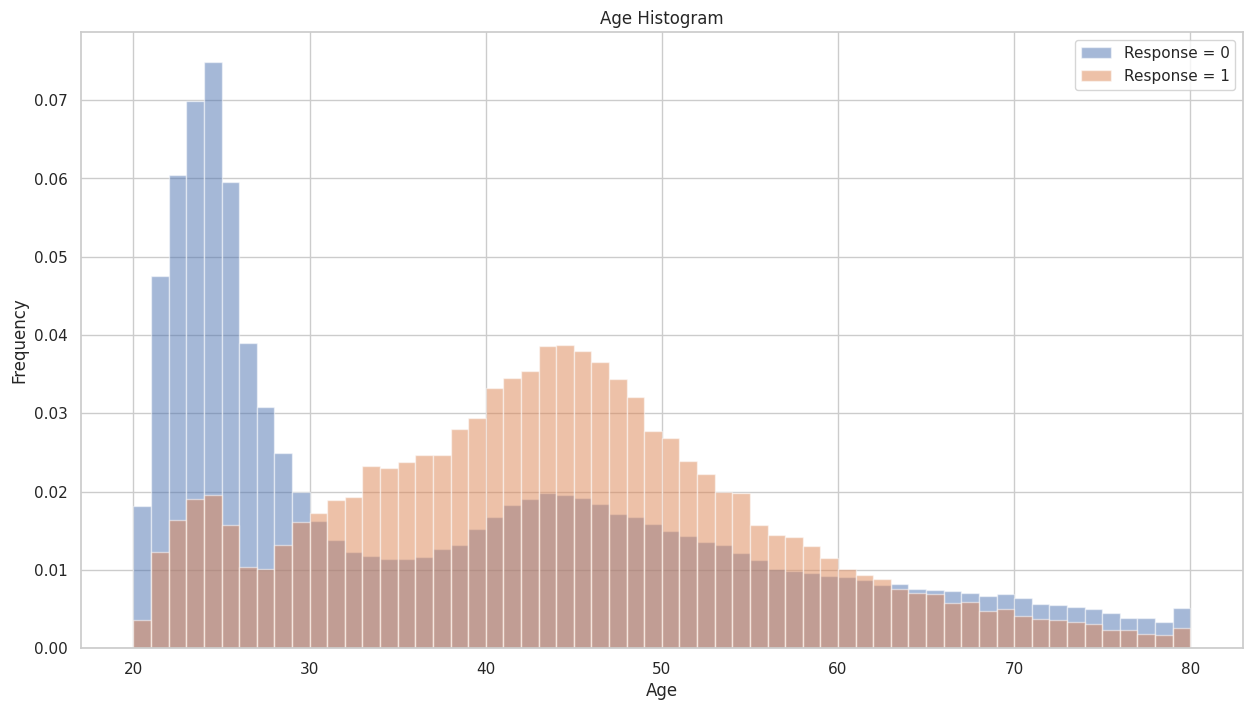

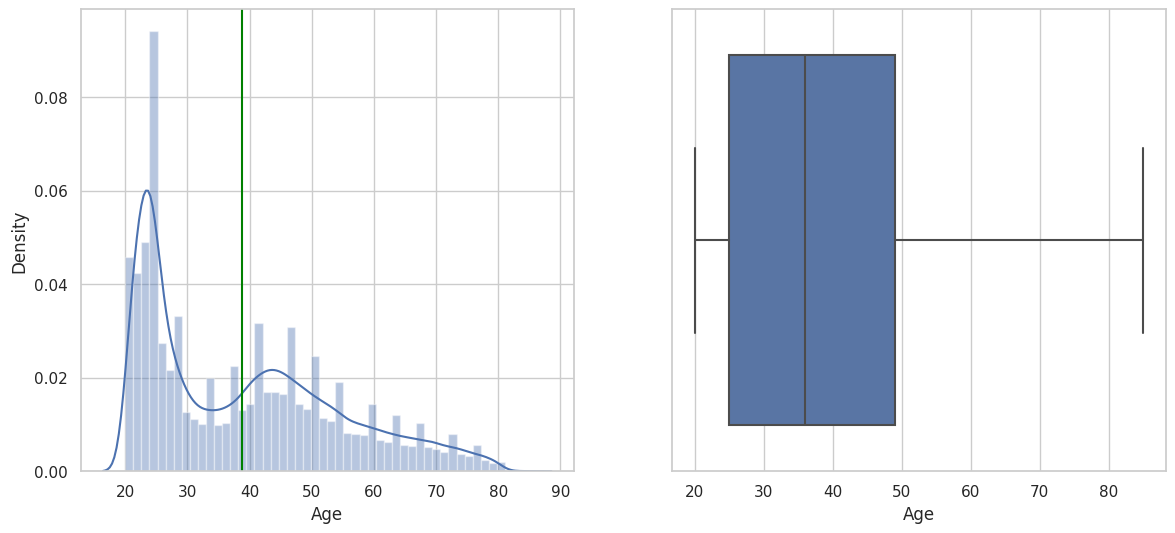

In [402]:
# Chart - 2 visualization code
#histogram of Age
plt.figure(figsize = (14,6))
df.groupby('Response').Age.hist(range=[20, 80], align = 'mid', bins=60, figsize=(15,8), density = True, alpha = 0.5)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Histogram')
plt.legend(['Response = 0', 'Response = 1'])
plt.show()
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
ax=sns.distplot(df['Age'])
ax.axvline(df['Age'].mean(),color='green')
plt.subplot(1,2,2)
sns.boxplot(x = 'Age',data=df)
plt.show()

From the above distribution of age we can see that most of the customers age is between 21 to 25 years.There are few Customers above the age of 60 years.
The dataset has more individuals with an age of 24.
40 to 60-year-olds had a higher likelihood of purchasing vehicle insurance.
From the above boxplot we can see that there no outlier in the dataset.

# **Chart - 3 Previously Insured varible contribution**

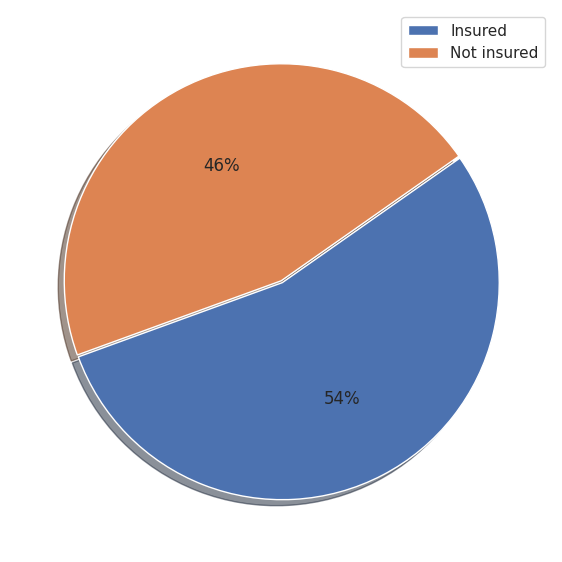

In [403]:
# Chart - 3 visualization code
# Create a pie chart to visualize the distribution of 'Previously_Insured'
plt.figure(figsize=(7,9))
plt.pie(df['Previously_Insured'].value_counts(), autopct='%.0f%%', shadow=True, startangle=200, explode=[0.01,0])
plt.legend(labels=['Insured','Not insured'])
plt.show()

54% customer are previously insured ahe 46% customer are are not insured yet.
Customer who are not perviosly insured are likely to be inetrested.

# **Chart - 4 Age Variable contribution relationship with other variables**

In [404]:
# Chart - 4 visualization code
# Create a new column 'Ages' by copying the values from the 'Age' column
df['Ages']=df['Age']

df.loc[(df['Ages']>=20) & (df['Ages']<27),'Age_label']='Teenagers(20-22)'
df.loc[(df['Ages']>=27) & (df['Ages']<29),'Age_label']='Young(23-30)'
df.loc[(df['Ages']>=29) & (df['Ages']<58),'Age_label']='Middle Age(31-60)'
df.loc[(df['Ages']>=58) & (df['Ages']<=85),'Age_label']='Old Age(61-84)'

df.loc[(df['Ages']>=20) & (df['Ages']<22),'Ages']=0
df.loc[(df['Ages']>=23) & (df['Ages']<30),'Ages']=1
df.loc[(df['Ages']>=31) & (df['Ages']<60),'Ages']=2
df.loc[(df['Ages']>=61) & (df['Ages']<=85),'Ages']=3

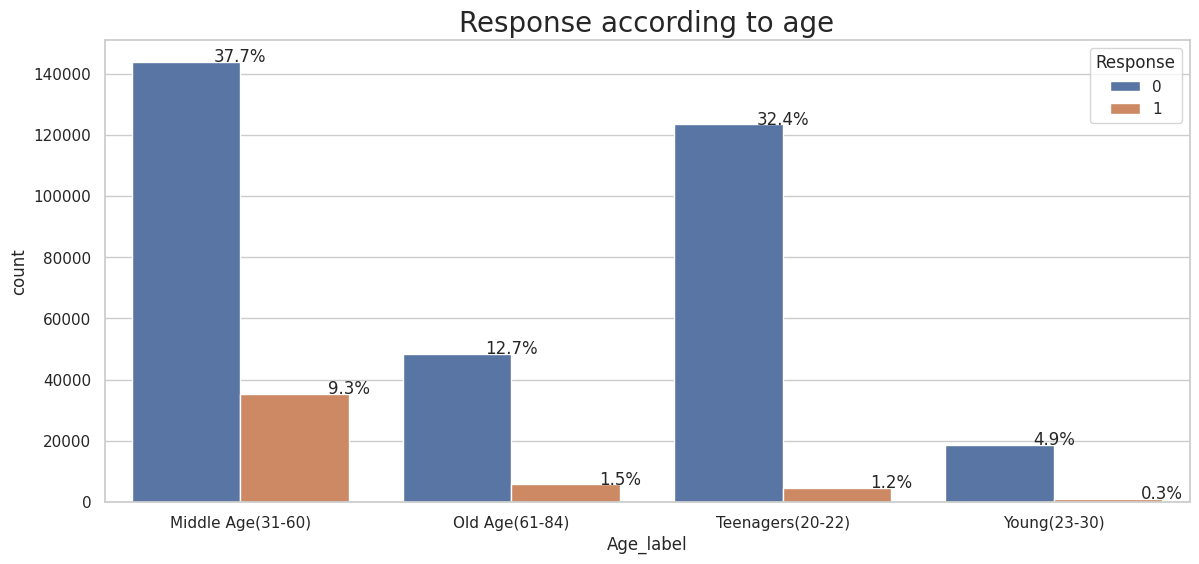

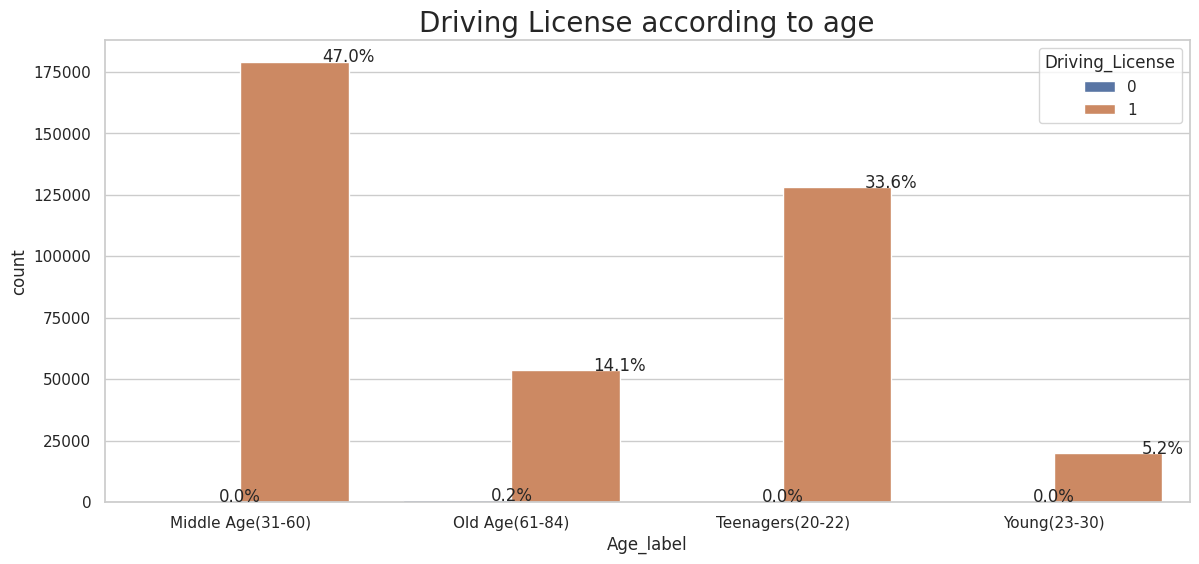

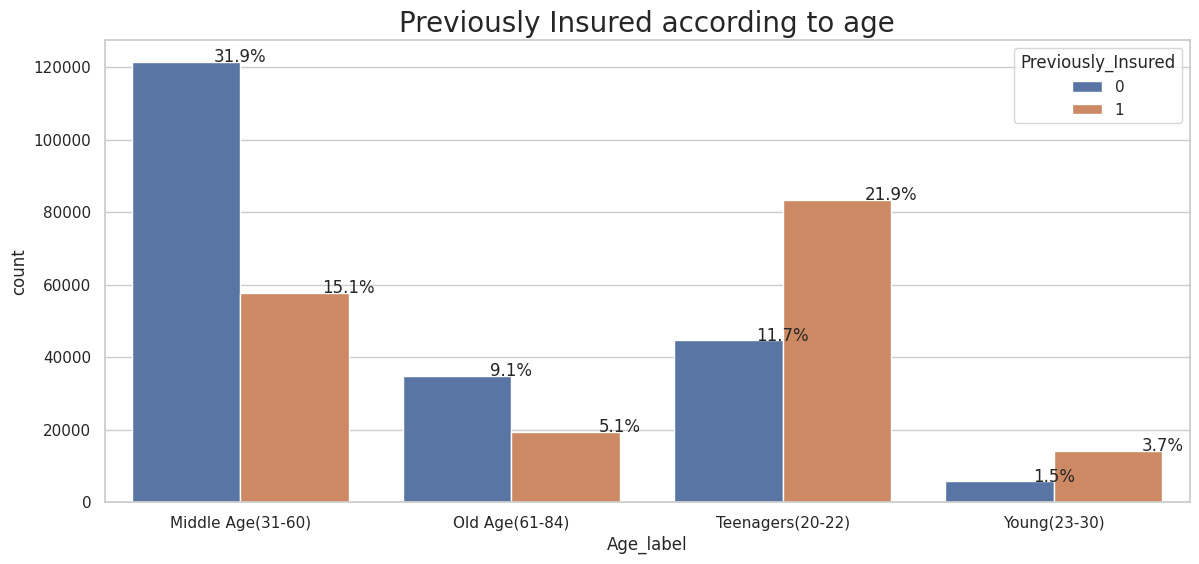

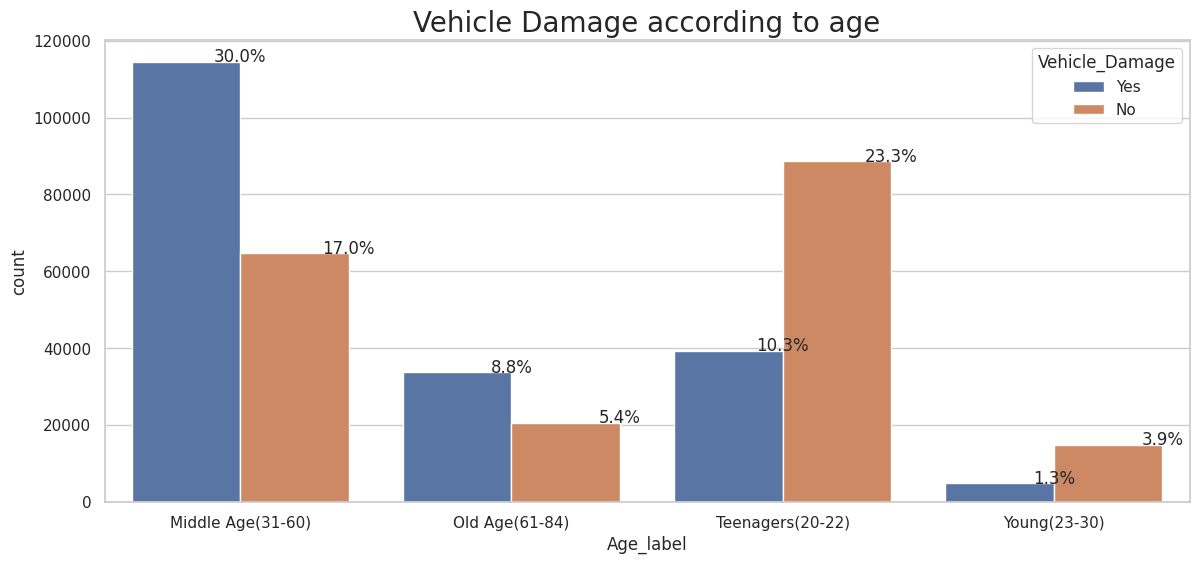

In [405]:
# Set the figure size and style
plt.figure(figsize=(14, 6))

# Define a custom color palette
custom_palette = ["#E74C3C", "#3498DB", "#2ECC71"]

# Set a common style for all the plots
sns.set(style="whitegrid")

# Get the total number of data points in the dataset
total = float(len(df))

# Plot 1: Response vs. Age
ax = sns.countplot(x='Age_label', hue='Response', data=df)
plt.title('Response according to age', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.show()

# Plot 2: Driving License vs. Age
plt.figure(figsize=(14, 6))
ax = sns.countplot(x='Age_label', hue='Driving_License', data=df)
plt.title('Driving License according to age', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.show()

# Plot 3: Previously Insured vs. Age
plt.figure(figsize=(14, 6))
ax = sns.countplot(x='Age_label', hue='Previously_Insured', data=df)
plt.title('Previously Insured according to age', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.show()

# Plot 4: Vehicle Damage vs. Age
plt.figure(figsize=(14, 6))
ax = sns.countplot(x='Age_label', hue='Vehicle_Damage', data=df)
plt.title('Vehicle Damage according to age', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.show()

**Middle-Aged Interest:** Approximately 9.3% of individuals in their middle age group show an interest in purchasing insurance. This suggests that middle-aged people represent a segment of potential customers for insurance products.

**Driving License:** Nearly 47% of middle-aged individuals in the dataset possess a driver's license. This implies a significant portion of middle-aged individuals is eligible for various vehicle insurance policies.

**Teenage Health Insurance:** About 21.9% of teenagers have health insurance. This finding indicates that a substantial proportion of teenagers are already covered by health insurance policies.

**Previous Insurance Coverage:** Similarly, approximately 21.9% of teenagers have had insurance previously, highlighting that many teenagers are familiar with insurance and have had prior coverage.

In light of these insights, it appears that the target audience for insurance companies may primarily consist of middle-aged individuals and teenagers. Middle-aged individuals could be potential customers for various insurance products, while teenagers, who already have insurance coverage and prior experience, may represent an opportunity for additional insurance offerings. This analysis suggests that focusing marketing efforts on these age groups could be an effective strategy to generate more leads for insurance companies.

# **Chart - 5 Gender Variable contribution Vs Response**

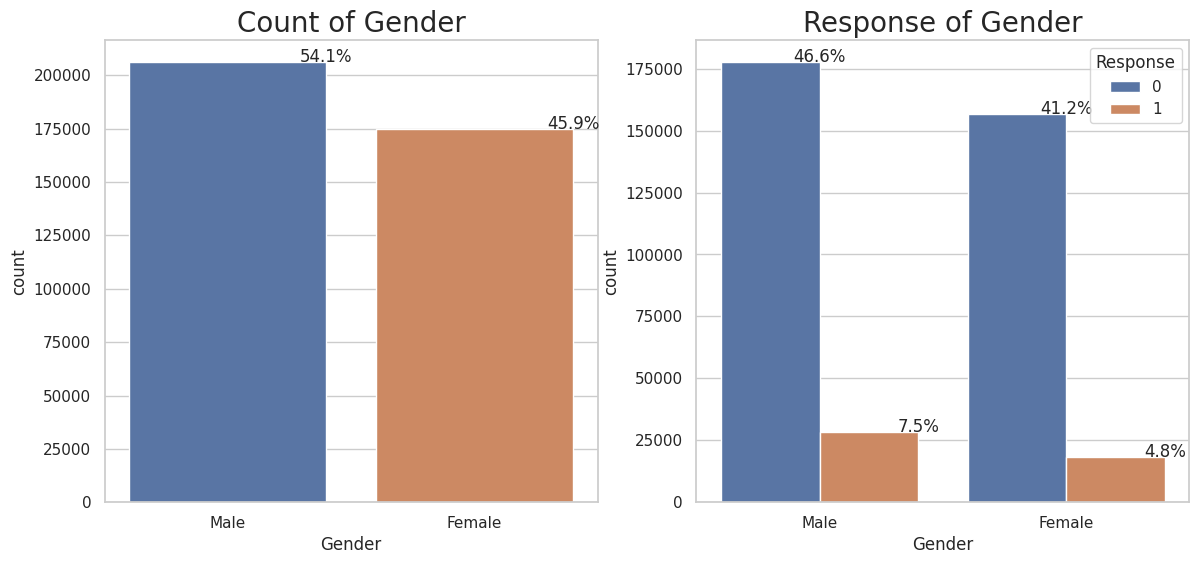

In [406]:
# Chart - 5 visualization code
# Create a figure with two subplots side by side
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)

# Define a custom color palette
custom_palette = ["#E74C3C", "#3498DB", "#2ECC71"]

# Set a common style for all the plots
sns.set(style="whitegrid")

# Calculate the total number of data points
total = float(len(df))

# Plot 1: Count of Gender
ax1 = sns.countplot(x='Gender', data=df)
plt.title('Count of Gender', fontsize=20)

# Annotate each bar with the percentage of total
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y), ha='center')

# Move to the second subplot
plt.subplot(1, 2, 2)
total = float(len(df))

# Plot 2: Response of Gender
ax2 = sns.countplot(x='Gender', hue='Response', data=df)
plt.title('Response of Gender', fontsize=20)

# Annotate each bar with the percentage of total
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y), ha='center')

# Display the subplots
plt.show()

when examining the 'Response' variable, it becomes evident that the response rate for individuals not interested in purchasing vehicle insurance is notably higher than those who express an interest in buying insurance. Specifically, only 12.3% of the dataset's population is inclined to purchase vehicle insurance, while the majority, accounting for 87.7%, displays a lack of interest in this type of insurance.

 The dataset predominantly consists of individuals who are not interested in vehicle insurance. The gender distribution is relatively balanced, with males showing slightly higher interest in purchasing insurance.

# **Chart - 6 Gender Vs. Response**

<Axes: xlabel='Gender'>

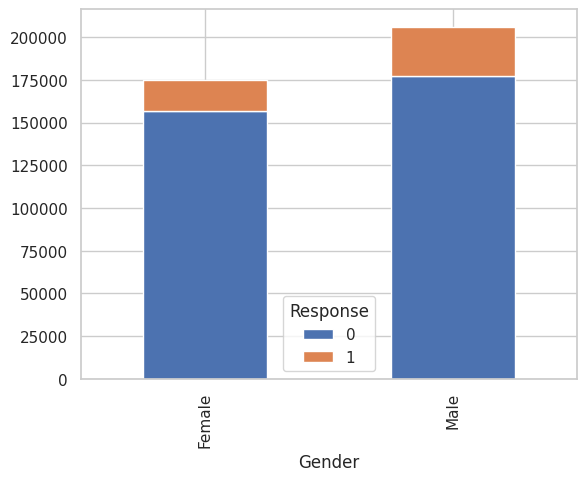

In [407]:
# Chart - 6 visualization code
# The resulting plot shows the distribution of 'Response' within each 'Gender' category.
df.groupby(['Gender', 'Response']).size().unstack().plot(kind = 'bar', stacked = True)

Male category is slightly greater than that of female and chances of buying the insurance is also little high

# **Chart - 7 Vehicle Age and Customer Response**

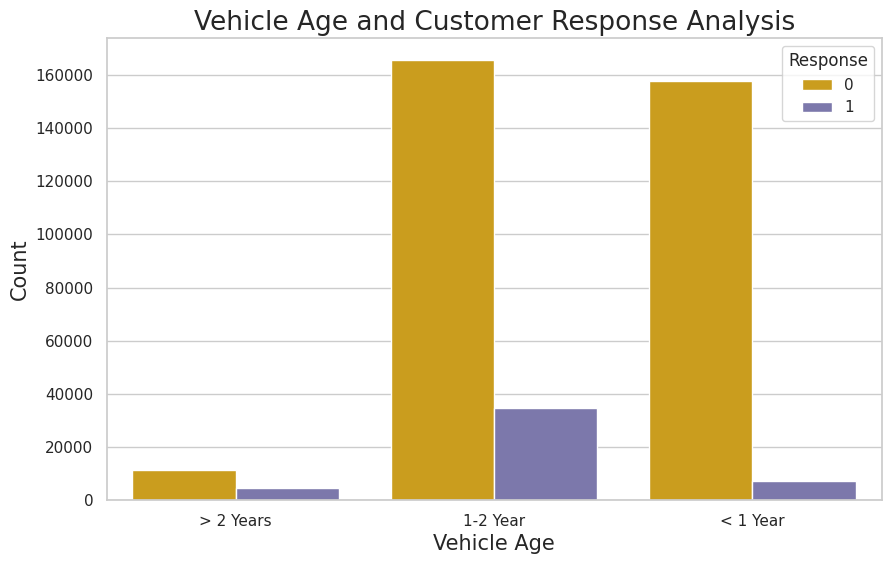

In [408]:
# Chart - 7 visualization code
# Set the figure size
plt.figure(figsize=(10, 6))
# Create a countplot to analyze the relationship between 'Vehicle_Age' and 'Response'
sns.countplot(data=df, x='Vehicle_Age', hue='Response', palette='Dark2_r')
# Set labels for the x and y axes
plt.xlabel('Vehicle Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
# Set a title for the plot
plt.title('Vehicle Age and Customer Response Analysis', fontsize=19)
# Display the plot
plt.show()

Customers with vechicle age 1-2 years are more likely to interested as compared to the other two

Customers with with Vehicle_Age <1 years have very less chance of buying Insurance

# **Chart - 8 Annual_Premium Vs Response**

<Axes: xlabel='Response', ylabel='Annual_Premium'>

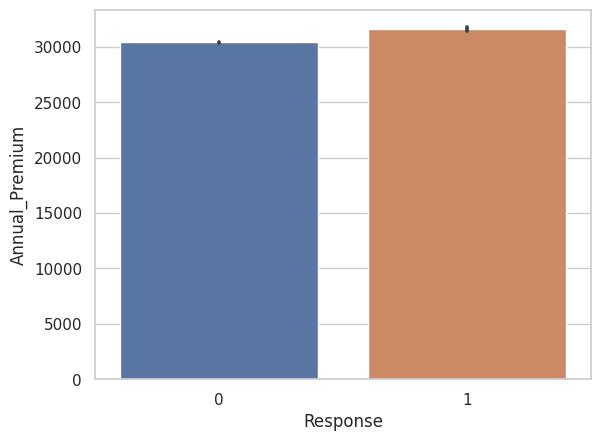

In [409]:
# Chart - 8 visualization code
# Create a bar plot to visualize the relationship between 'Response' and 'Annual_Premium'
sns.barplot(x='Response', y='Annual_Premium', data=df)

People who response have slightly higher annual premium

# **Chart - 9 Age Vs Response**

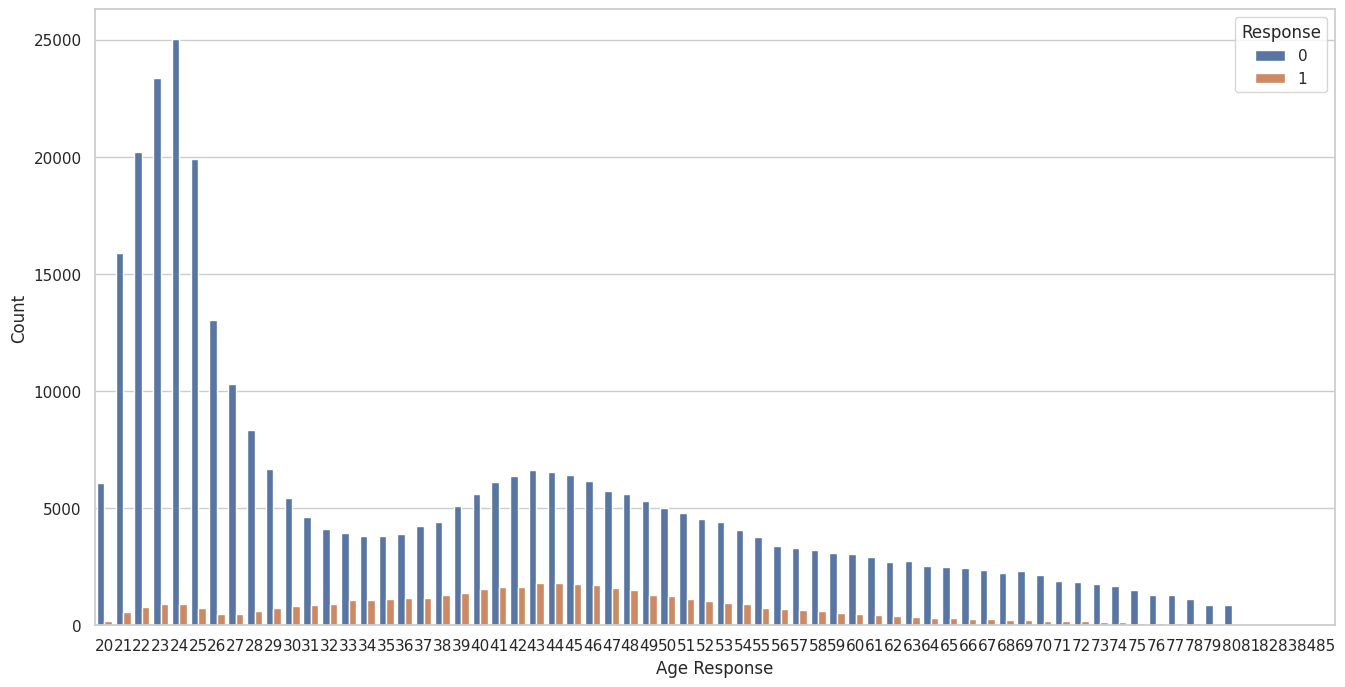

In [410]:
# Chart - 9 visualization code
# Set the figure size
plt.figure(figsize=(16, 8))

# Create a countplot to analyze the distribution of 'Response' within different 'Age' categories
sns.countplot(data=df, x='Age', hue='Response')

# Set labels for the x and y axes
plt.xlabel('Age Response')
plt.ylabel('Count')

# Display the plot
plt.show()

People ages between from 30 to 55 are more likely to respond.
while Young people below 30 are not interested in vehicle insurance.

# **Chart - 10 Annual Premium Vs Response**

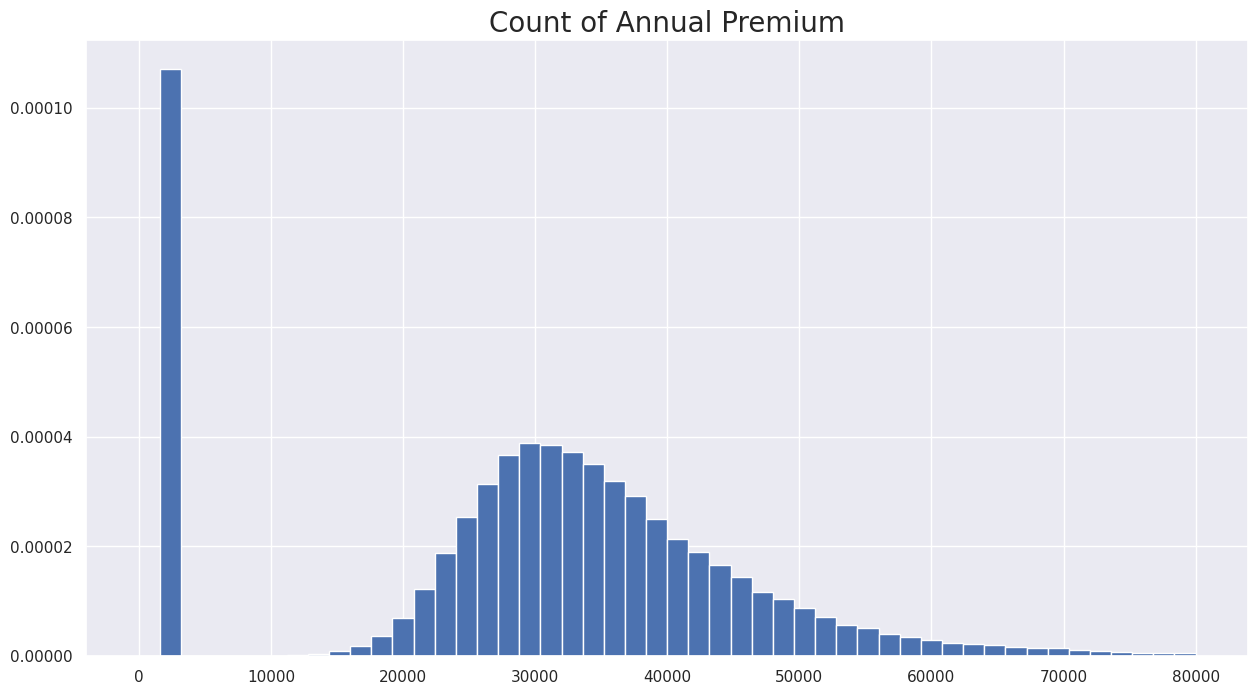

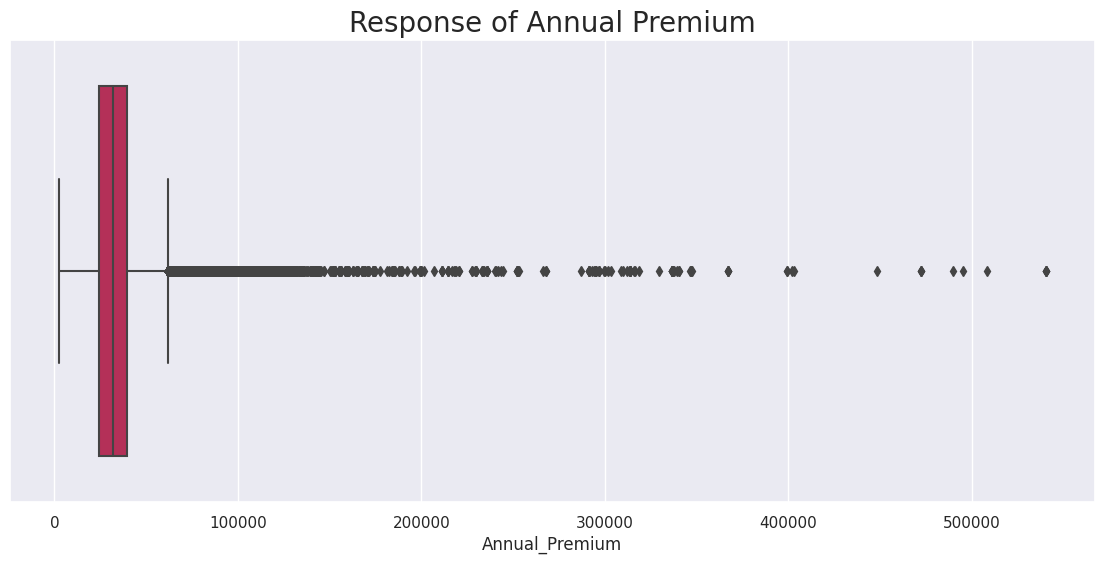

In [411]:
# Chart - 10 visualization code
# Create a figure with a size of 14x6
plt.figure(figsize=(14, 6))

# Set Seaborn style to "darkgrid" for the first plot
sns.set(style="darkgrid")

# Create a histogram to visualize the distribution of 'Annual_Premium'
df['Annual_Premium'].hist(figsize=(15, 8), bins=50, density=True, range=[0, 80000])

# Set a title for the histogram
plt.title('Count of Annual Premium', fontsize=20)

# Display the histogram
plt.show()

# Create a new figure with a size of 14x6 for the second plot
plt.figure(figsize=(14, 6))

# Create a boxplot to analyze the relationship between 'Annual_Premium' and 'Response'
sns.boxplot(x='Annual_Premium', palette="rocket_r", data=df)

# Set a title for the boxplot
plt.title('Response of Annual Premium', fontsize=20)

# Display the boxplot
plt.show()

From the distribution plot we can infer that the annual premimum variable is right skewed
From the boxplot we can observe lot of outliers in the variable

# **Chart - 11 Vehicle Damage Count**

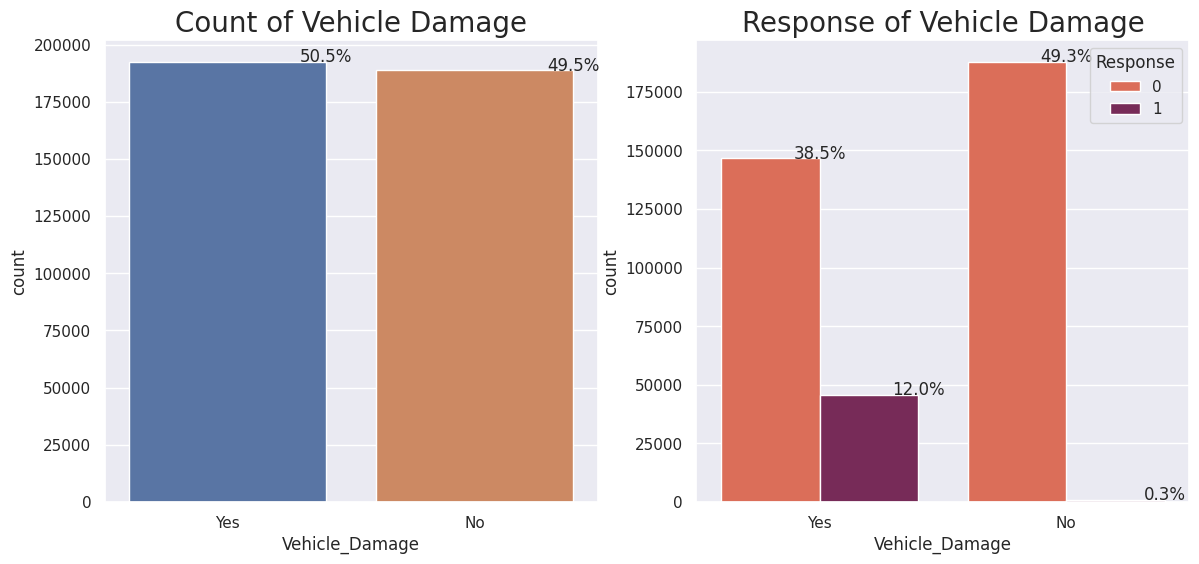

In [412]:
# Chart - 11 visualization code
# Create a figure with a size of 14x6
plt.figure(figsize=(14, 6))

# Create the first subplot (1,2,1)
plt.subplot(1, 2, 1)

# Set Seaborn style to "darkgrid" for the first plot
sns.set(style="darkgrid")

# Calculate the total number of data points
total = float(len(df))

# Plot 1: Count of 'Vehicle_Damage'
ax1 = sns.countplot(x='Vehicle_Damage', data=df)

# Set a title for the first plot
plt.title('Count of Vehicle Damage', fontsize=20)

# Annotate each bar with the percentage of total
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y), ha='center')

# Create the second subplot (1,2,2)
plt.subplot(1, 2, 2)

# Calculate the total number of data points (redundant, but okay)
total = float(len(df))

# Plot 2: Response of 'Vehicle_Damage'
ax2 = sns.countplot(x='Vehicle_Damage', hue='Response', palette="rocket_r", data=df)

# Set a title for the second plot
plt.title('Response of Vehicle Damage', fontsize=20)

# Annotate each bar with the percentage of total
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y), ha='center')

# Display the subplots
plt.show()

50.5% of the vehicles have past damage
12.0% of people who have had a damaged vehicle in the past want to acquire vehicle insurance

# **Chart - 12 Vintage Variable Box Plot**

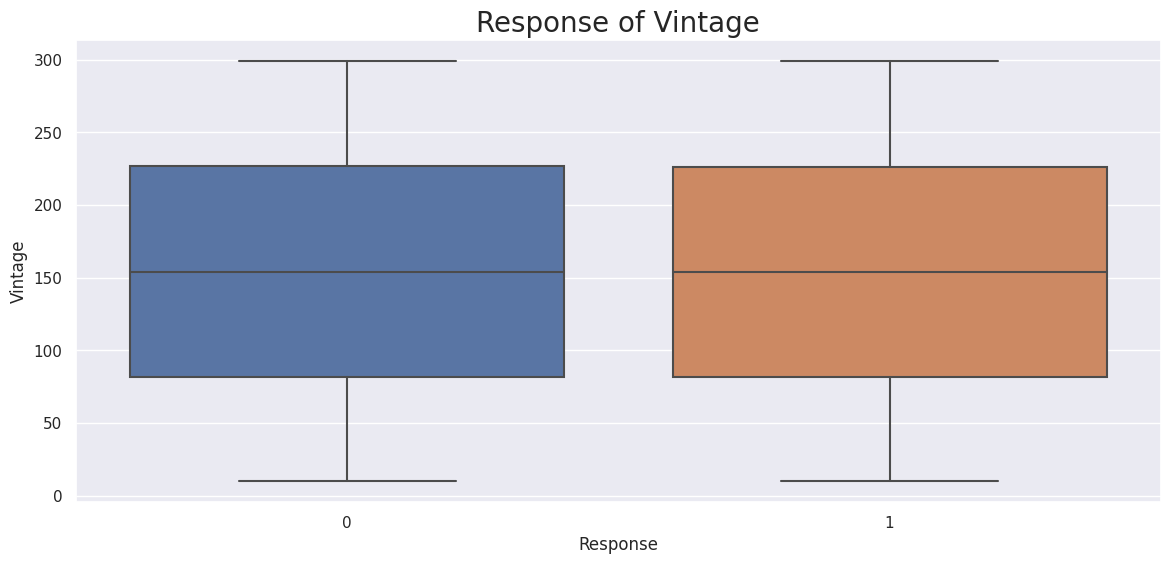

In [413]:
# Chart - 12 visualization code
# Create a figure with a size of 14x6
plt.figure(figsize=(14, 6))

# Create a boxplot to analyze the relationship between 'Response' and 'Vintage'
sns.boxplot(x='Response', y='Vintage', data=df)

# Set a title for the boxplot
plt.title('Response of Vintage', fontsize=20)

# Display the boxplot
plt.show()

We can also see that Vintage has an almost uniform distribution from above figure.

#### Chart - 14 - Correlation Heatmap

<Axes: >

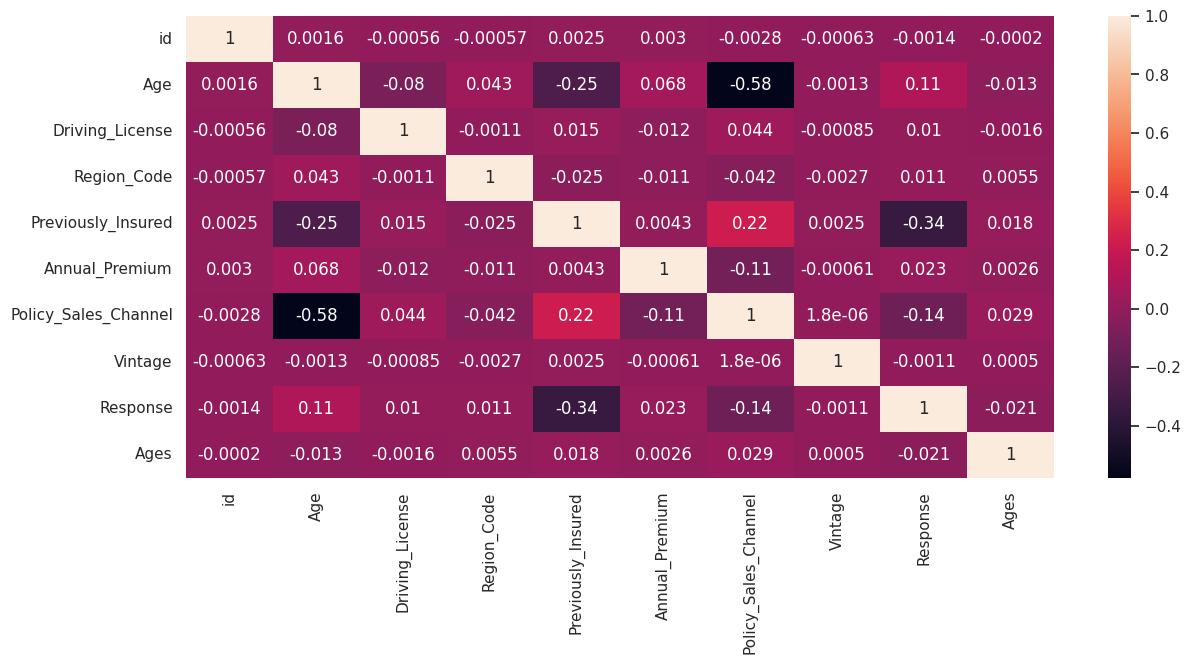

In [414]:
# Correlation Heatmap visualization code
# Create a figure with a size of 14x6
plt.figure(figsize=(14, 6))

# Generate a heatmap to visualize the correlation between numerical variables in the dataset
sns.heatmap(df.corr(), annot=True)

In [415]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(X):
    # Create a DataFrame to store the variable names and their corresponding VIF values
    vif = pd.DataFrame()
    vif["variables"] = X.columns

    # Calculate VIF for each variable in the dataset
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    # Return the DataFrame with variable names and VIF values
    return (vif)

In [416]:
# calculate the Variance Inflation Factor (VIF) for a set of independent variables
cal_vif(df[[i for i in df.describe().columns if i not in ['Response']]])

,variables,VIF
0,id,3.976958
1,Age,10.458872
2,Driving_License,37.794432
3,Region_Code,4.954553
4,Previously_Insured,1.986774
5,Annual_Premium,4.175168
6,Policy_Sales_Channel,7.756800
7,Vintage,4.373313
8,Ages,1.228353


Since nearly every customer in the dataset has a driver's license, it provides limited variation and doesn't contribute valuable information for predicting the response to vehicle insurance. Consequently, it may be reasonable to drop this column from your analysis, as it is not providing meaningful insights and including it may not be beneficial for modeling or predictions.

In [417]:
# Drop the 'Driving License' Variable
df.drop(columns=['Driving_License'],axis=1,inplace=True)
df.drop(columns=['Ages'],axis=1,inplace=True)
df.drop(columns = ['Age_label'],axis=1,inplace=True)

#### Chart - 15 - Pair Plot

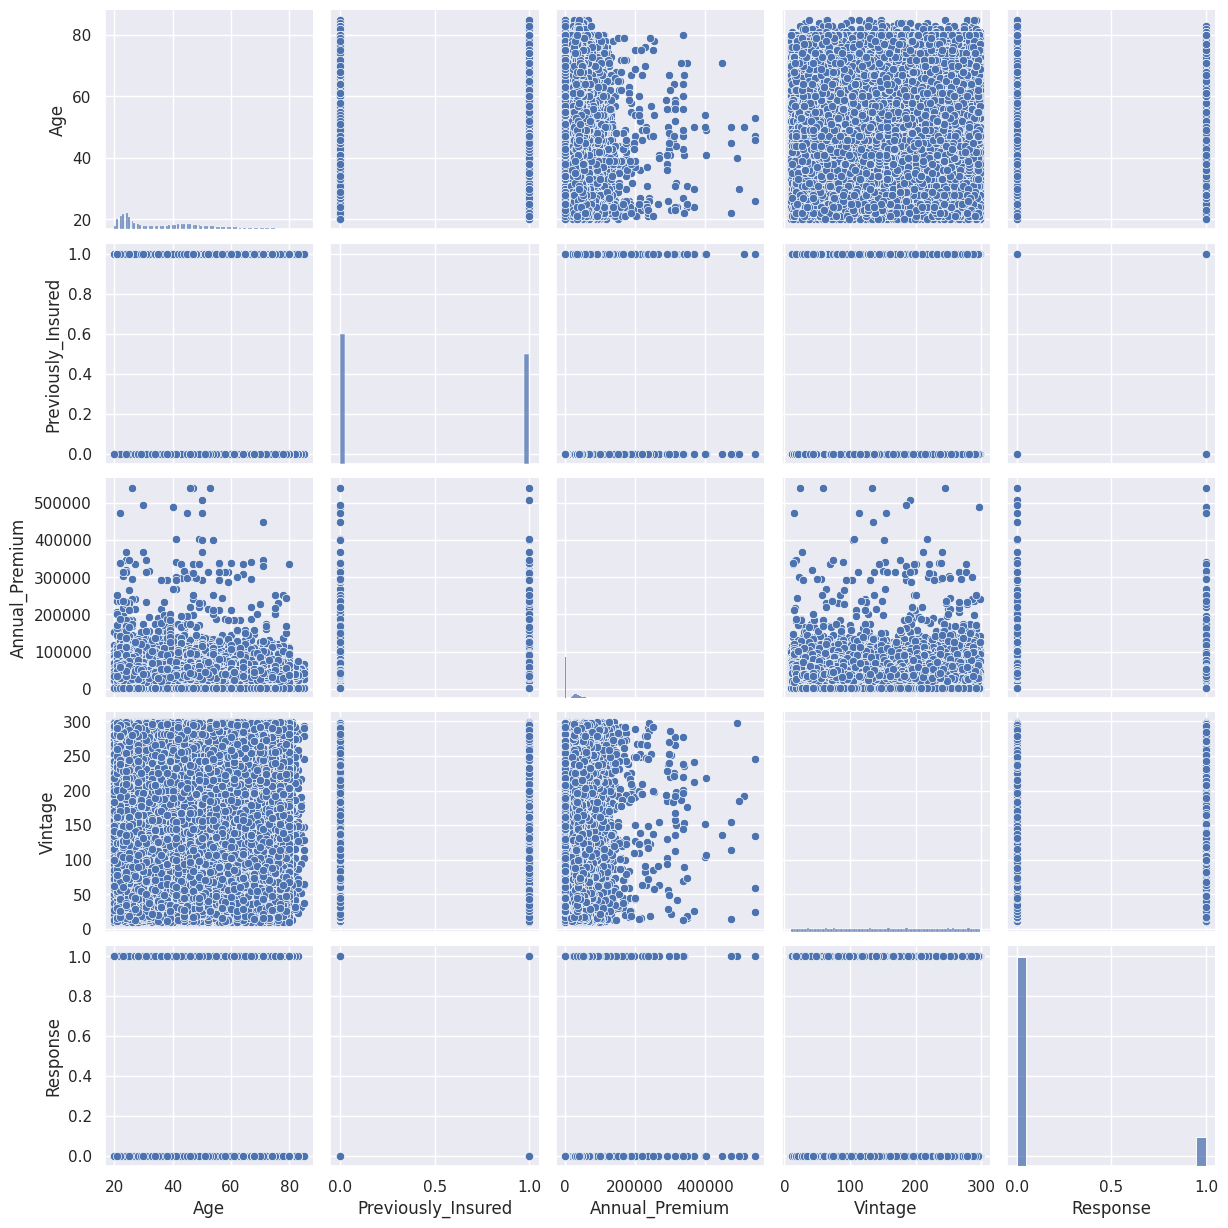

In [418]:
# Pair Plot visualization code
# Specify the columns you want to include in the pair plot
columns = ['Age', 'Previously_Insured', 'Annual_Premium', 'Vintage', 'Response']

# Create a pair plot using Seaborn
sns.pairplot(df[columns], kind='scatter')

# Show the pair plot
plt.show()

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [419]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There is no any missing values in given dataset. So no need to deal with missing values.

### 2. Handling Outliers

In [420]:
# Handling Outliers & Outlier treatments
Q1 = df["Annual_Premium"].quantile(0.25)
Q3 = df["Annual_Premium"].quantile(0.75)
IQR = Q3 - Q1

In [421]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [422]:
outliers = df[(df['Annual_Premium'] < lower_bound) | (df['Annual_Premium'] > upper_bound)]

In [423]:
print("Outliers in 'Annual_Premium' column:")
print(outliers)

Outliers in 'Annual_Premium' column:
            id  Gender  Age  Region_Code  Previously_Insured Vehicle_Age  \
25          26  Female   21         28.0                   1    < 1 Year   
37          38  Female   25         28.0                   1    < 1 Year   
67          68    Male   60         28.0                   0    1-2 Year   
139        140    Male   21         29.0                   1    < 1 Year   
149        150  Female   22         11.0                   1    < 1 Year   
...        ...     ...  ...          ...                 ...         ...   
380959  380960    Male   25          8.0                   1    < 1 Year   
380998  380999  Female   33          8.0                   0    1-2 Year   
381035  381036  Female   22         11.0                   1    < 1 Year   
381047  381048  Female   52          8.0                   1    1-2 Year   
381079  381080    Male   33         28.0                   0    < 1 Year   

       Vehicle_Damage  Annual_Premium  Policy_Sale

In [424]:
df['Annual_Premium'] = df['Annual_Premium'].clip(lower_bound, upper_bound)

In [425]:
print("After outlier treatment:")
print(df['Annual_Premium'].describe())

After outlier treatment:
count    381109.000000
mean      30148.169353
std       15476.398118
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max       61892.500000
Name: Annual_Premium, dtype: float64


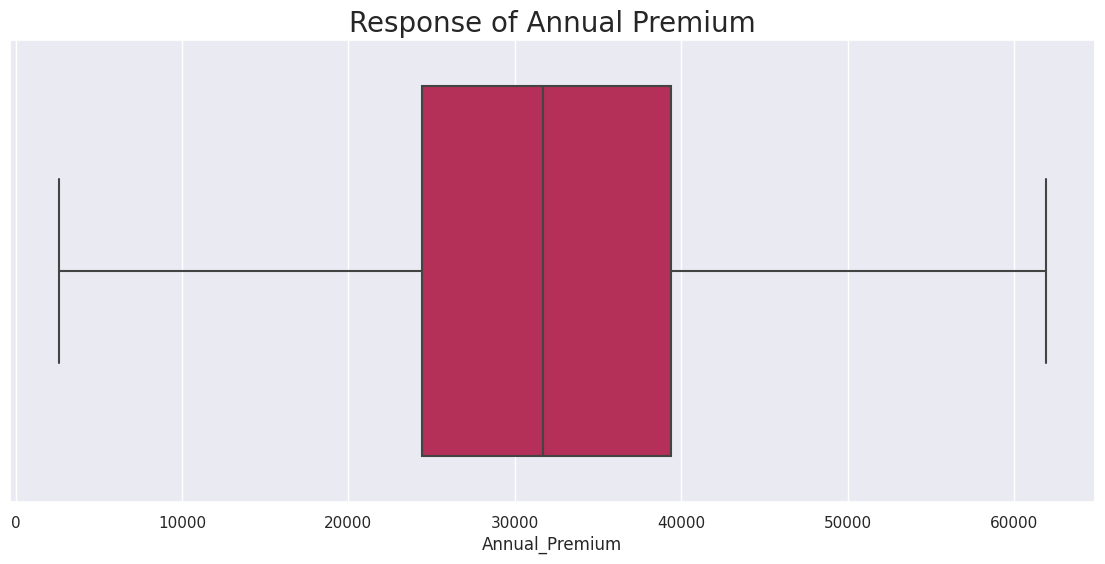

In [426]:
# Create a new figure with a size of 14x6 for the second plot
plt.figure(figsize=(14, 6))

# Create a boxplot to analyze the relationship between 'Annual_Premium' and 'Response'
sns.boxplot(x='Annual_Premium', palette="rocket_r", data=df)

# Set a title for the boxplot
plt.title('Response of Annual Premium', fontsize=20)

# Display the boxplot
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

There are outlier present in Annual_premium variable I treat this by interquartile range capping and flooring method. Because in this method we cap all values that are away from other data points towards upper and lower boundary.

### 3. Categorical Encoding

In [427]:
# Convert 'Gender' column to binary values, 1 for 'Female' and 0 for 'Male'
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})

# Convert 'Vehicle_Damage' column to binary values, 1 for 'Yes' and 0 for 'No'
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes': 1, 'No': 0})

# Convert 'Vehicle_Age' column to numerical values: 1 for '1-2 Year', 0 for '< 1 Year', 2 for '> 2 Years'
df['Vehicle_Age'] = df['Vehicle_Age'].map({'1-2 Year': 1, '< 1 Year': 0, '> 2 Years': 2})

In [428]:
df.head()

,id,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,28.0,0,2,1,40454.0,26.0,217,1
1,2,0,76,3.0,0,1,0,33536.0,26.0,183,0
2,3,0,47,28.0,0,2,1,38294.0,26.0,27,1
3,4,0,21,11.0,1,0,0,28619.0,152.0,203,0
4,5,1,29,41.0,1,0,0,27496.0,152.0,39,0


In [429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  int64  
 2   Age                   381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  int64  
 6   Vehicle_Damage        381109 non-null  int64  
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 34.9 MB


#### What all categorical encoding techniques have you used & why did you use those techniques?

**Label Encoding:**

**Technique: **Label encoding assigns a unique integer to each category within a column.

**Use Case:** Label encoding is suitable for ordinal categorical variables where the categories have a natural order. For example, "low," "medium," and "high" can be encoded as 0, 1, and 2, respectively

#### 2. Feature Selection

In [430]:
# Select your features wisely to avoid overfitting
x=df[['Gender','Age','Previously_Insured','Vehicle_Age','Vehicle_Damage','Annual_Premium','Vintage']]
y=df['Response']

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes, in our dataset response target variable is imbalanced.

Imbalanced datasets occur when the distribution of classes or categories in the response variable is not roughly equal. In our case, the "No" category has a count of 340,000, while the "Yes" category has a count of 50,000. This significant difference in class counts indicates an imbalance.

In [431]:
# Handling Imbalanced Dataset (If needed)
from sklearn.utils import resample
#Resampling
ros = RandomOverSampler(random_state=0)
X_new,y_new= ros.fit_resample(x, y)

print("After Random Over Sampling Of Minor Class Total Samples are :", len(y_new))
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))

After Random Over Sampling Of Minor Class Total Samples are : 668798
Original dataset shape Counter({0: 334399, 1: 46710})
Resampled dataset shape Counter({1: 334399, 0: 334399})


### 8. Data Splitting

In [432]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test ,y_train, y_test=  train_test_split(X_new, y_new, random_state=42, test_size=0.3)
print(X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(468158, 7) (468158,)
(200640, 7) (200640,)


##### What data splitting ratio have you used and why?

The reason for choosing a 70:30 split or any other split ratio depends on our goals and the characteristics of your data:

**Larger Training Set** (e.g., 70%): A larger training set can be beneficial when you have a lot of data and you want your machine learning model to learn from a substantial portion of it. This can help the model capture complex patterns and relationships in the data.

**Smaller Testing Set** (e.g., 30%): A smaller testing set can still provide a reasonable evaluation of your model's performance while maximizing the amount of data used for training. This is often preferred when you have limited data.

**Data Imbalance: **If your dataset is imbalanced, where one class or category is significantly more prevalent than others, you might need to adjust the split ratio. In such cases, you may use techniques like stratified sampling to ensure the training and testing sets maintain the same class distribution as the original data.

**Cross-Validation: **In some cases, you may use techniques like k-fold cross-validation instead of a fixed split ratio. Cross-validation can provide a more robust estimate of your model's performance by repeatedly splitting the data into training and testing sets.

**Data Size:** If you have a very small dataset, you might use a larger portion for testing to ensure that you have enough data to evaluate your model properly.

### 6. Data Scaling

##### Which method have you used to scale you data and why?

**Standardization (Z-score Scaling):**

Scales the data to have a mean of 0 and a standard deviation of 1.
Centers the data around 0, which can help when the data has a roughly normal distribution.
Often used when you assume that your data follows a normal distribution or when you want to emphasize the importance of outliers in your data.

In [434]:
# Normalizing the Dataset using Standard Scaling Technique.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [435]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  int64  
 2   Age                   381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  int64  
 6   Vehicle_Damage        381109 non-null  int64  
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 34.9 MB


## ***7. ML Model Implementation***

**Classification Models:**  various classification models, including Logistic Regression, Decision Tree, Random Forest, Gradient Boost, XGBoost, and LightGBM. These are algorithms used for classifying data into different categories or classes.

**Performance Metrics:**

**Precision:** It measures the accuracy of positive predictions by calculating the ratio of true positive predictions to the total number of positive predictions.

**Recall:** This metric quantifies the model's ability to identify all actual positive cases by calculating the ratio of true positive predictions to the total number of actual positive cases.

**F1-Score:** The F1-Score is a combination of precision and recall, expressed as the harmonic mean of these two metrics.

**Confusion Matrix:** The confusion matrix is a table that summarizes the model's performance by showing the number of true positives, false positives, true negatives, and false negatives it makes.

**ROC Curve:** The ROC curve is a graphical representation of a binary classifier's performance at different discrimination thresholds. It plots the true positive rate (sensitivity) against the false positive rate (1 - specificity) to assess the model's ability to distinguish between positive and negative cases.

# **ML Model - 1 Logistic Regression**

In [448]:
# ML Model - 1 Implementation
logistic_model = LogisticRegression(random_state=30)
# Fit the Algorithm
logistic_model=logistic_model.fit(X_train,y_train)
# Predict on the model
y_pred_lg = logistic_model.predict(X_test)
y_pred_prob_lg = logistic_model.predict_proba(X_test)[:,1]

In [449]:
# Evaluation
RS_lgt= recall_score(y_test, y_pred_lg)
print("Recall_Score : ", RS_lgt)

PS_lgt= precision_score(y_test, y_pred_lg)
print("Precision_Score :",PS_lgt)

f1S_lgt= f1_score(y_test, y_pred_lg)
print("f1_Score :", f1S_lgt)

AS_lgt= accuracy_score(y_pred_lg, y_test)
print("Accuracy_Score :",AS_lgt)

acu_lgt = roc_auc_score(y_pred_lg, y_test)
print("ROC_AUC Score:",acu_lgt)

Recall_Score :  0.9760905038605429
Precision_Score : 0.707192237544965
f1_Score : 0.8201636130305197
Accuracy_Score : 0.7855811403508772
ROC_AUC Score: 0.8341923623731996


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The ML model used in this case is Logistic Regression. Let's break down the performance of the Logistic Regression model using the provided evaluation metric scores:

Recall Score (Sensitivity): 0.9761

The high recall score of approximately 0.9761 indicates that the Logistic Regression model is excellent at correctly identifying true positive cases. It captures nearly 97.61% of all actual positive cases. This is a crucial metric when the cost of missing positive cases is high, such as in medical diagnoses.

Precision Score: 0.7072

The precision score of around 0.7072 signifies that the model's positive predictions are accurate approximately 70.72% of the time. In other words, when the model predicts a positive case, it is correct 70.72% of the time.

F1-Score: 0.8202

The F1-Score, a harmonic mean of precision and recall, provides a balance between precision and recall. With a score of approximately 0.8202, the Logistic Regression model strikes a good balance between making accurate positive predictions and capturing true positive cases.

Accuracy Score: 0.7856

The accuracy score of about 0.7856 represents the overall accuracy of the model's predictions. It indicates that the model correctly predicts the class for nearly 78.56% of the cases in the dataset.

ROC AUC Score: 0.8342

The ROC AUC score evaluates the model's ability to distinguish between positive and negative cases. With a score of approximately 0.8342, the Logistic Regression model exhibits good discrimination power in a binary classification task.

In summary, the Logistic Regression model is performing well based on these evaluation metrics. It excels in capturing positive cases (high recall), maintains a reasonable balance between precision and recall (F1-Score), and has good discriminatory power (ROC AUC Score).

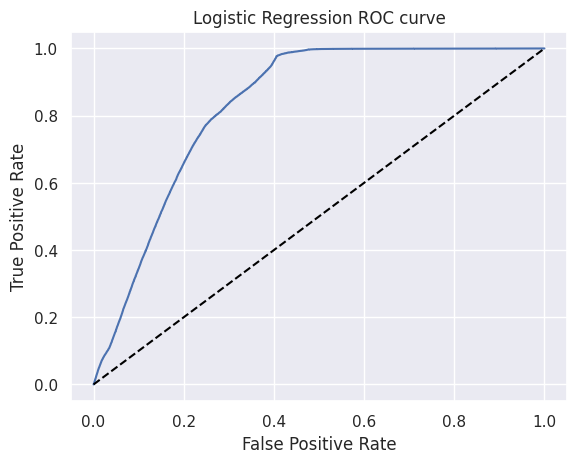

In [451]:
# Visualizing evaluation Metric Score chart
#ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_lg)
plt.title('Logistic Regression ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

[[59518 40618]
 [ 2403 98101]]




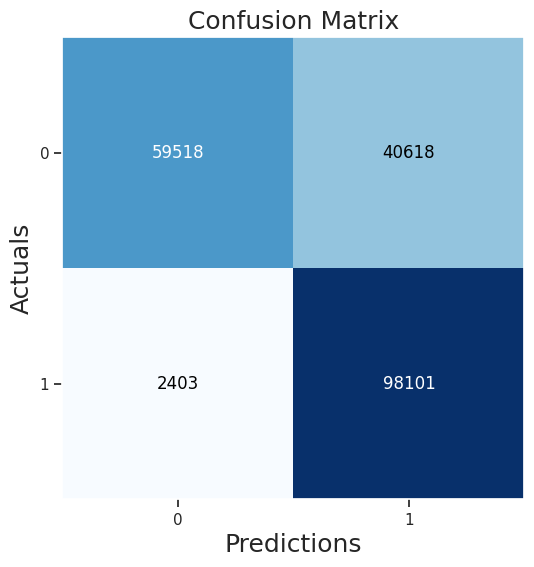

In [452]:
#confusion matrix
cm_logistic = confusion_matrix(y_test, y_pred_lg)
print(cm_logistic)
print('\n')
fig, ax = plot_confusion_matrix(conf_mat=cm_logistic, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [455]:
# Create a Logistic Regression model for tuning
logistic_model_tuning = LogisticRegression()

# Define a parameter grid for hyperparameter tuning
param_logreg = {'C': [1, 0.5, 0.1, 5, 9], 'penalty': ['l2', 'l1', 'elasticnet']}

# Perform hyperparameter tuning using GridSearchCV
l_m_t = GridSearchCV(estimator=logistic_model_tuning, param_grid=param_logreg, cv=3, n_jobs=-1, verbose=1, scoring='recall')
l_m_t.fit(X_train, y_train)

# Get the best-tuned logistic regression estimator
log_tuned = l_m_t.best_estimator_

# Make predictions on the test set using the tuned model
y_tuned_log = log_tuned.predict(X_test)

# Get the predicted probabilities for positive class
y_tuned_log_prob = log_tuned.predict_proba(X_test)[:, 1]

Fitting 3 folds for each of 15 candidates, totalling 45 fits


In [456]:

# Calculate the Recall Score
RS_lgt_tun = recall_score(y_test, y_tuned_log)
print("Recall_Score:", RS_lgt_tun)

# Calculate the Precision Score
PS_lgt_tun = precision_score(y_test, y_tuned_log)
print("Precision_Score:", PS_lgt_tun)

# Calculate the F1-Score
f1S_lgt_tun = f1_score(y_test, y_tuned_log)
print("F1_Score:", f1S_lgt_tun)

# Calculate the Accuracy Score
AS_lgt_tun = accuracy_score(y_tuned_log, y_test)
print("Accuracy_Score:", AS_lgt_tun)

# Calculate the ROC AUC Score
acu_lgt_tun = roc_auc_score(y_tuned_log, y_test)
print("ROC_AUC Score:", acu_lgt_tun)

Recall_Score: 0.9760905038605429
Precision_Score: 0.707192237544965
F1_Score: 0.8201636130305197
Accuracy_Score: 0.7855811403508772
ROC_AUC Score: 0.8341923623731996


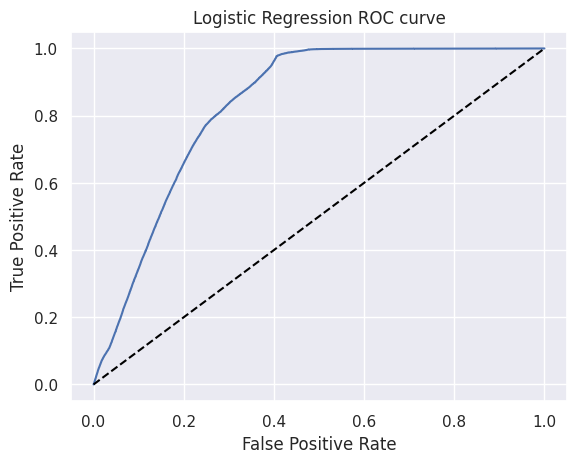

In [457]:
#ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_tuned_log_prob)
plt.title('Logistic Regression ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

[[59518 40618]
 [ 2403 98101]]




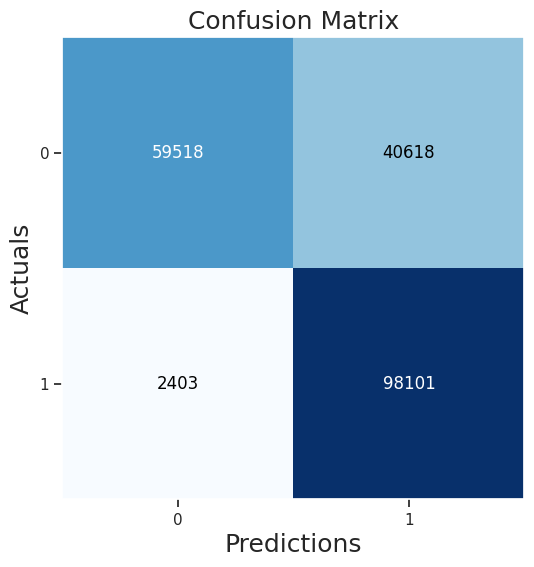

In [458]:
#confusion matrix
cm_logistic_tun = confusion_matrix(y_test, y_tuned_log)
print(cm_logistic_tun)
print('\n')
fig, ax = plot_confusion_matrix(conf_mat=cm_logistic_tun, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used is GridSearchCV. GridSearchCV is a commonly used hyperparameter optimization method in machine learning for the following reasons:

Exhaustive Search: GridSearchCV performs an exhaustive search over a specified hyperparameter grid. It considers all possible combinations of hyperparameters provided in the grid. This ensures that no combination is missed, making it a comprehensive optimization technique.

Cross-Validation: GridSearchCV incorporates cross-validation, typically through a specified number of cross-validation folds (in this case, cv=3). Cross-validation helps in assessing the model's generalization performance, preventing overfitting, and providing a more reliable estimate of how the model will perform on unseen data.

Scoring Metric: GridSearchCV allows you to specify a scoring metric (in this case, 'recall'). By optimizing hyperparameters based on the chosen scoring metric, you can fine-tune the model to prioritize a specific aspect of performance, such as recall, precision, or accuracy, depending on the problem's requirements.

Easy to Implement: GridSearchCV is straightforward to implement, making it accessible to practitioners and a good starting point for hyperparameter tuning.

# **ML Model - 2 Decision Tree**

In [459]:
# Create a Decision Tree model with a specified random state
dt_model = DecisionTreeClassifier(random_state=30)

# Train the Decision Tree model using the training data
dt_model = dt_model.fit(X_train, y_train)

# Make predictions on the test data
dt_pred = dt_model.predict(X_test)

# Get the predicted probabilities for the positive class
dt_pred_prob = dt_model.predict_proba(X_test)[:, 1]

In [460]:
# Evaluate the Decision Tree Classifier

# Calculate the Recall Score
RS_dt = recall_score(y_test, dt_pred)
print("Recall_Score:", RS_dt)

# Calculate the Precision Score
PS_dt = precision_score(y_test, dt_pred)
print("Precision_Score:", PS_dt)

# Calculate the F1-Score
f1S_dt = f1_score(y_test, dt_pred)
print("F1_Score:", f1S_dt)

# Calculate the Accuracy Score
AS_dt = accuracy_score(y_test, dt_pred)
print("Accuracy_Score:", AS_dt)

# Calculate the ROC AUC Score
acu_dt = roc_auc_score(y_test, dt_pred)
print("ROC_AUC Score:", acu_dt)

Recall_Score: 0.9927266576454669
Precision_Score: 0.8856430194574634
F1_Score: 0.9361324826421467
Accuracy_Score: 0.9321471291866029
ROC_AUC Score: 0.9320358142425624


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The ML model used in this case is a Decision Tree classifier. Let's analyze the performance of the Decision Tree model using the provided evaluation metric scores:

Recall Score (Sensitivity): 0.9927

The high recall score of approximately 0.9927 indicates that the Decision Tree model is extremely effective at correctly identifying true positive cases. It captures nearly 99.27% of all actual positive cases, making it suitable for applications where minimizing false negatives is crucial.

Precision Score: 0.8856

The precision score of around 0.8856 signifies that the model's positive predictions are accurate approximately 88.56% of the time. In other words, when the model predicts a positive case, it is correct 88.56% of the time.

F1-Score: 0.9361

The F1-Score, a harmonic mean of precision and recall, provides a balanced evaluation metric. With a score of approximately 0.9361, the Decision Tree model strikes a good balance between making accurate positive predictions and capturing true positive cases.

Accuracy Score: 0.9321

The accuracy score of about 0.9321 represents the overall accuracy of the model's predictions. It indicates that the model correctly predicts the class for nearly 93.21% of the cases in the dataset.

ROC AUC Score: 0.9320

The ROC AUC score evaluates the model's ability to distinguish between positive and negative cases. With a score of approximately 0.9320, the Decision Tree model exhibits strong discriminatory power in a binary classification task.

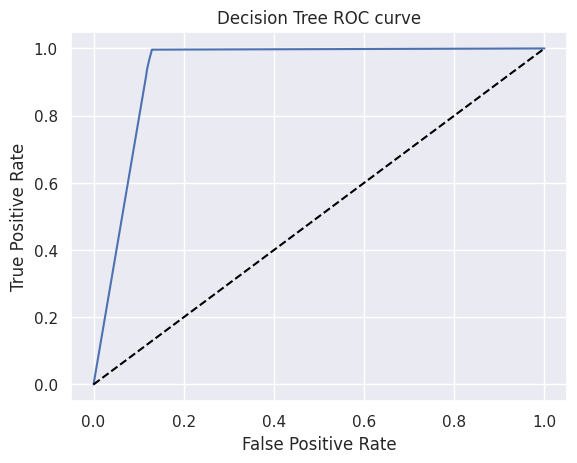

In [461]:
# Visualizing evaluation Metric Score chart
#ROC Curve
fpr, tpr, _ = roc_curve(y_test, dt_pred_prob)
plt.title('Decision Tree ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

[[87253 12883]
 [  731 99773]]




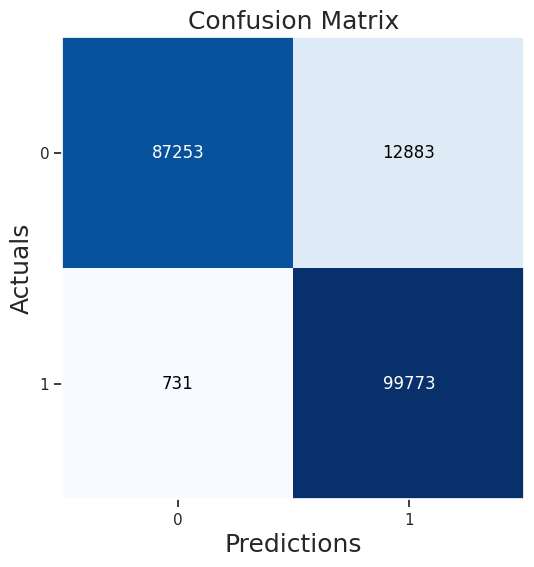

In [462]:
#confusion matrix
cm_dt= confusion_matrix(y_test, dt_pred)
print(cm_dt)
print('\n')
fig, ax = plot_confusion_matrix(conf_mat=cm_dt, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

<Axes: >

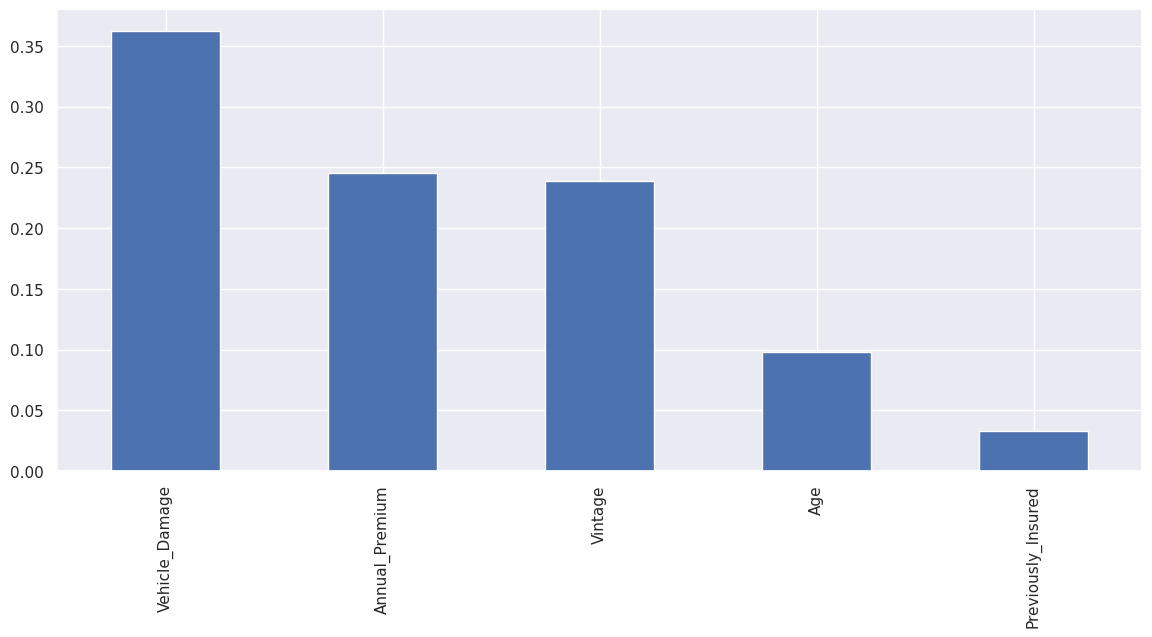

In [463]:
# Visualize Feature Importances

# Create a figure with the specified size
plt.figure(figsize=(14, 6))

# Extract and plot the top 5 most important features based on the Decision Tree model's feature importances
feat_importances = pd.Series(dt_model.feature_importances_, index=X_new.columns)
feat_importances.nlargest(5).plot(kind='bar')

#### 3. Explain each evaluation metric's indication towards business and the future business imppact.

Recall Score (Sensitivity):

Business Significance: Recall measures the model's ability to correctly identify all relevant instances (true positives) among all actual positive instances. High recall is essential when the cost of missing positive cases is high.
Business Impact: In scenarios where missing positive cases can have severe consequences, a high recall score can reduce the likelihood of false negatives. For example, in medical diagnosis, high recall ensures that critical health conditions are not missed, potentially saving lives.

Precision Score:

Business Significance: Precision measures the accuracy of positive predictions, indicating the percentage of true positive predictions among all positive predictions. High precision is valuable when false positives are costly or can lead to customer dissatisfaction.
Business Impact: In situations where false positive predictions have financial or reputational consequences, high precision can help avoid costly errors. For example, in fraud detection, high precision minimizes the risk of blocking legitimate transactions.

F1-Score:

Business Significance: The F1-Score is the harmonic mean of precision and recall, providing a balanced measure of model performance. It emphasizes both precision and recall and is useful when there's a need to balance the trade-off between these two metrics.
Business Impact: The F1-Score helps strike a balance between minimizing false negatives and false positives. This balance is critical in applications like customer churn prediction, where both missed opportunities and incorrect customer targeting can impact revenue and customer satisfaction.

Accuracy Score:

Business Significance: Accuracy measures the overall correctness of the model's predictions, considering both true positives and true negatives. It's a general measure of model performance.
Business Impact: High accuracy is generally beneficial, as it ensures that a large proportion of predictions are correct. In customer segmentation, for instance, high accuracy can lead to more targeted marketing efforts, potentially increasing sales and customer satisfaction.

ROC AUC Score:

Business Significance: The ROC AUC score evaluates the model's ability to discriminate between positive and negative cases by comparing the true positive rate and false positive rate at different classification thresholds.
Business Impact: A high ROC AUC score is important in applications where the ability to distinguish between classes is crucial. For instance, in credit risk assessment, a high ROC AUC score can help identify high-risk applicants and improve lending decisions, reducing potential financial losses.

# **ML Model - 3 Random Forest**

In [491]:
# Create a Random Forest model with a specified random state
rf_model = RandomForestClassifier(random_state=30)

# Train the Random Forest model using the training data
rf_model = rf_model.fit(X_train, y_train)

# Make predictions on the test data
rf_pred = rf_model.predict(X_test)

# Get the predicted probabilities for the positive class
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]

In [492]:
# Evaluation of Random Forest Classifier

# Calculate the Recall Score
RS_rf = recall_score(y_test, rf_pred)
print("Recall_Score:", RS_rf)

# Calculate the Precision Score
PS_rf = precision_score(y_test, rf_pred)
print("Precision_Score:", PS_rf)

# Calculate the F1-Score
f1S_rf = f1_score(y_test, rf_pred)
print("F1_Score:", f1S_rf)

# Calculate the Accuracy Score
AS_rf = accuracy_score(y_test, rf_pred)
print("Accuracy_Score:", AS_rf)

# Calculate the ROC AUC Score
acu_rf = roc_auc_score(y_test, rf_pred)
print("ROC_AUC Score:", acu_rf)

Recall_Score: 0.9943285839369578
Precision_Score: 0.8799873198136717
F1_Score: 0.933670299485675
Accuracy_Score: 0.9292314593301435
ROC_AUC Score: 0.9291118432986698


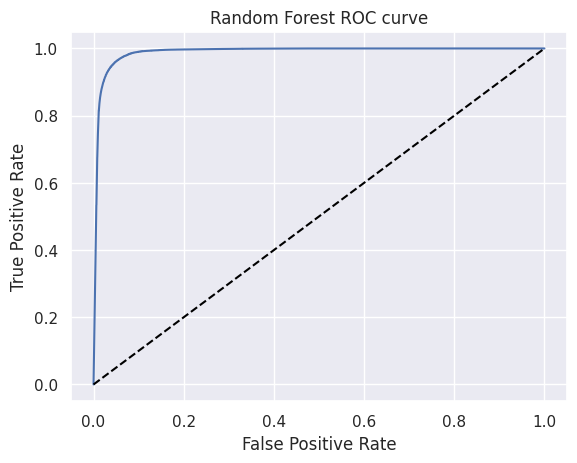

In [493]:
#ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf_pred_proba)
plt.title('Random Forest ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

[[86507 13629]
 [  570 99934]]




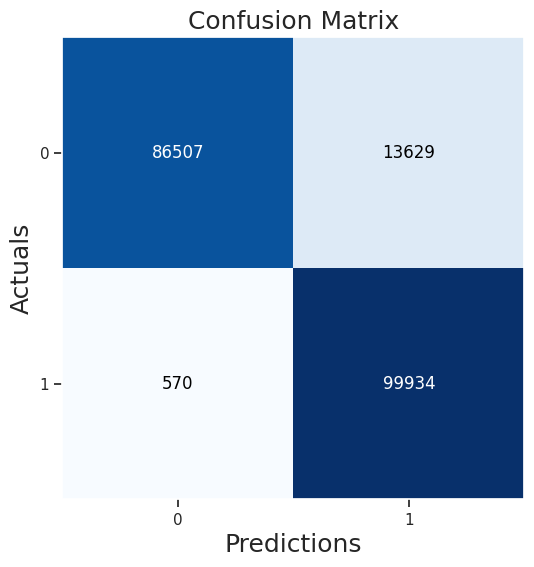

In [494]:
#confusion matrix
cm_rf= confusion_matrix(y_test, rf_pred)
print(cm_rf)
print('\n')
fig, ax = plot_confusion_matrix(conf_mat=cm_rf, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

<Axes: >

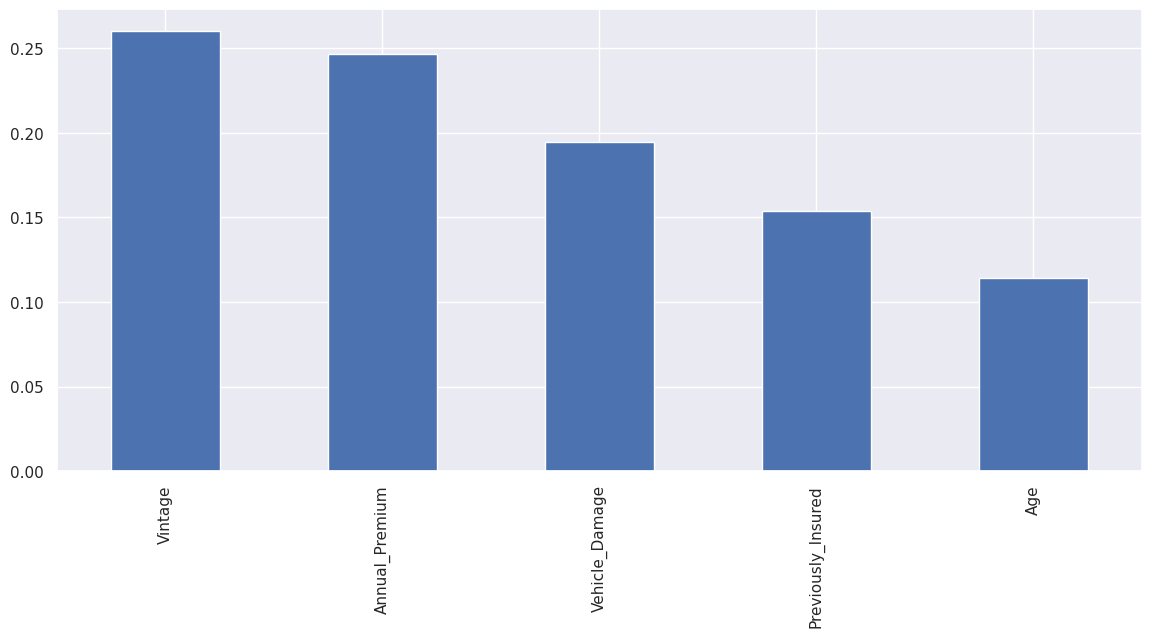

In [495]:
# Visualizing Feature Importances with Random Forest

# Create a figure for the plot with specified dimensions
plt.figure(figsize=(14, 6))

# Get feature importances from the Random Forest model
feat_importances = pd.Series(rf_model.feature_importances_, index=X_new.columns)

# Plot the top 5 feature importances as a bar chart
feat_importances.nlargest(5).plot(kind='bar')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The ML model used in this case is the Random Forest Classifier. Let's analyze the performance of the Random Forest model using the provided evaluation metric scores:

Recall Score (Sensitivity): 0.9943

The high recall score of approximately 0.9943 indicates that the Random Forest model is exceptionally effective at correctly identifying true positive cases. It captures nearly 99.43% of all actual positive cases. This level of recall is exceptional and suggests that the model rarely misses positive cases.

Precision Score: 0.8800

The precision score of around 0.8800 suggests that the model's positive predictions are accurate approximately 88.00% of the time. When the model predicts a positive case, it is correct nearly 88.00% of the time.

F1-Score: 0.9337

The F1-Score, a harmonic mean of precision and recall, provides a balanced evaluation metric. With a score of approximately 0.9337, the Random Forest model strikes a good balance between making accurate positive predictions and capturing true positive cases.

Accuracy Score: 0.9292

The accuracy score of about 0.9292 represents the overall correctness of the model's predictions. It indicates that the model correctly predicts the class for nearly 92.92% of the cases in the dataset.

ROC AUC Score: 0.9291

The ROC AUC score evaluates the model's ability to distinguish between positive and negative cases. With a score of approximately 0.9291, the Random Forest model exhibits strong discriminatory power in a binary classification task.

# **ML Model - 4 KNN**

In [464]:
# Create a KNN model
knn_model = KNeighborsClassifier()

# Train the KNN model using the training data
knn_model = knn_model.fit(X_train, y_train)

# Make predictions on the test data
knn_pred = knn_model.predict(X_test)

# Get the predicted probabilities for the positive class
knn_pred_prob = knn_model.predict_proba(X_test)[:, 1]

In [465]:
# Evaluate the k-Nearest Neighbors (KNN) Classifier

# Calculate the Recall Score
RS_knn = recall_score(y_test, knn_pred)
print("Recall_Score:", RS_knn)

# Calculate the Precision Score
PS_knn = precision_score(y_test, knn_pred)
print("Precision_Score:", PS_knn)

# Calculate the F1-Score
f1S_knn = f1_score(y_test, knn_pred)
print("F1_Score:", f1S_knn)

# Calculate the Accuracy Score
AS_knn = accuracy_score(y_test, knn_pred)
print("Accuracy_Score:", AS_knn)

# Calculate the ROC AUC Score
acu_knn = roc_auc_score(y_test, knn_pred)
print("ROC_AUC Score:", acu_knn)

Recall_Score: 0.9651257661386612
Precision_Score: 0.7907634614600741
F1_Score: 0.8692874010279207
Accuracy_Score: 0.8546102472089314
ROC_AUC Score: 0.8544071748325326


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The ML model used in this case is the K-Nearest Neighbors (KNN) classifier. Let's analyze the performance of the KNN model using the provided evaluation metric scores:

Recall Score (Sensitivity): 0.9651

The recall score of approximately 0.9651 indicates that the KNN model is effective at correctly identifying true positive cases. It captures nearly 96.51% of all actual positive cases. This is a strong performance, suitable for applications where minimizing false negatives is important, such as medical diagnoses.

Precision Score: 0.7908

The precision score of around 0.7908 suggests that the model's positive predictions are accurate approximately 79.08% of the time. When the model predicts a positive case, it is correct nearly 79.08% of the time.

F1-Score: 0.8693

The F1-Score, a harmonic mean of precision and recall, provides a balanced measure of model performance. With a score of approximately 0.8693, the KNN model strikes a good balance between making accurate positive predictions and capturing true positive cases.

Accuracy Score: 0.8546

The accuracy score of about 0.8546 represents the overall correctness of the model's predictions. It indicates that the model correctly predicts the class for nearly 85.46% of the cases in the dataset.

ROC AUC Score: 0.8544

The ROC AUC score evaluates the model's ability to distinguish between positive and negative cases. With a score of approximately 0.8544, the KNN model exhibits good discriminatory power in a binary classification task.

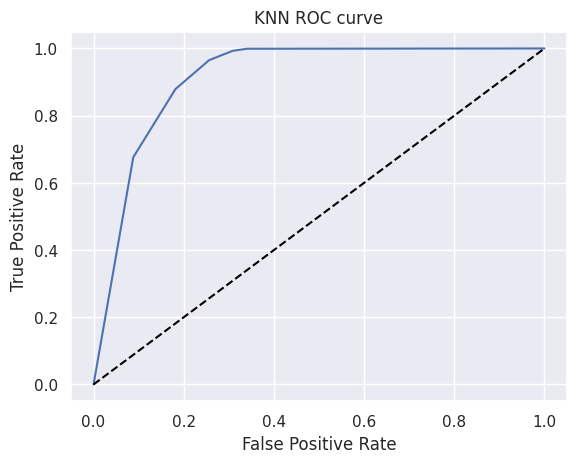

In [466]:
# Visualizing evaluation Metric Score chart
fpr, tpr, _ = roc_curve(y_test, knn_pred_prob)
plt.title('KNN ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

[[74470 25666]
 [ 3505 96999]]




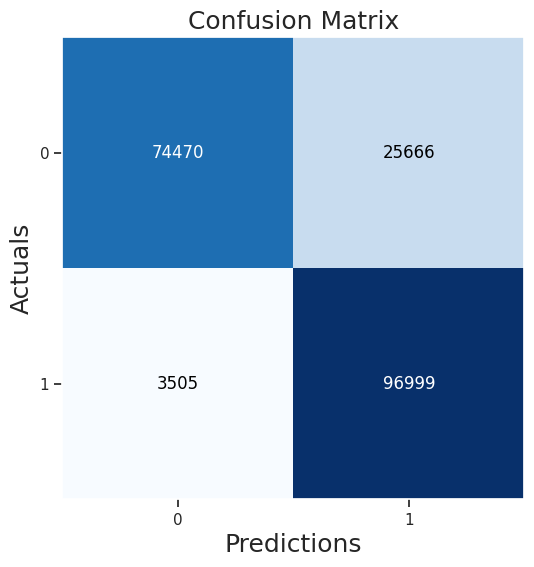

In [467]:
#confusion matrix
cm_knn= confusion_matrix(y_test, knn_pred)
print(cm_knn)
print('\n')
fig, ax = plot_confusion_matrix(conf_mat=cm_knn, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [468]:
# Create a KNN model for hyperparameter tuning
KNN_tuning = KNeighborsClassifier()

# Define a parameter grid for hyperparameter tuning
param_KNN = {'n_neighbors': [5, 7, 9], 'weights': ['uniform', 'distance'], 'p': [2, 1]}

# Perform hyperparameter tuning using GridSearchCV
model_KNN_tuned = GridSearchCV(estimator=KNN_tuning, param_grid=param_KNN, cv=3, n_jobs=-1, verbose=1, scoring='recall')
model_KNN_tuned.fit(X_train, y_train)

# Get the best-tuned KNN estimator
KNN_tuned = model_KNN_tuned.best_estimator_

# Make predictions on the test set using the tuned KNN model
y_tuned_KNN = KNN_tuned.predict(X_test)

# Get the predicted probabilities for the positive class
y_tuned_KNN_prob = KNN_tuned.predict_proba(X_test)[:, 1]

Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [469]:
# Calculate the Recall Score
RS_knn_tun = recall_score(y_test, y_tuned_KNN)
print("Recall_Score:", RS_knn_tun)

# Calculate the Precision Score
PS_knn_tun = precision_score(y_test, y_tuned_KNN)
print("Precision_Score:", PS_knn_tun)

# Calculate the F1-Score
f1S_knn_tun = f1_score(y_test, y_tuned_KNN)
print("F1_Score:", f1S_knn_tun)

# Calculate the Accuracy Score
AS_knn_tun = accuracy_score(y_test, y_tuned_KNN)
print("Accuracy_Score:", AS_knn_tun)

# Calculate the ROC AUC Score
acu_knn_tun = roc_auc_score(y_test, y_tuned_KNN)
print("ROC_AUC Score:", acu_knn_tun)

Recall_Score: 0.994507681286317
Precision_Score: 0.7989385001518712
F1_Score: 0.886060015070254
Accuracy_Score: 0.8718799840510367
ROC_AUC Score: 0.8716546555349058


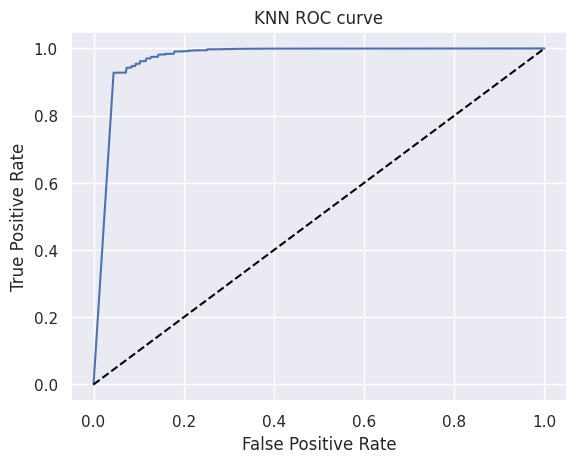

In [470]:
#roc curve
fpr, tpr, _ = roc_curve(y_test, y_tuned_KNN_prob)
plt.title('KNN ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

[[74982 25154]
 [  552 99952]]




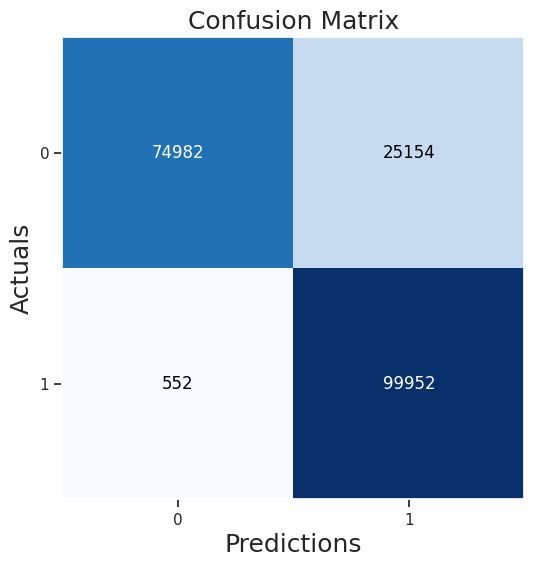

In [471]:
#confusion matrix
cm_knn= confusion_matrix(y_test, y_tuned_KNN)
print(cm_knn)
print('\n')
fig, ax = plot_confusion_matrix(conf_mat=cm_knn, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# **ML Model - 5 Gradient Boosting**

In [472]:
# Create a Gradient Boosting model with a specified random state
GB_model = GradientBoostingClassifier(random_state=30)

# Train the Gradient Boosting model using the training data
GB_model = GB_model.fit(X_train, y_train)

# Make predictions on the test data
GB_pred = GB_model.predict(X_test)

# Get the predicted probabilities for the positive class
GB_pred_prob = GB_model.predict_proba(X_test)[:, 1]

In [473]:
# Evaluate the Gradient Boosting Classifier

# Calculate the Recall Score
RS_GB = recall_score(y_test, GB_pred)
print("Recall_Score:", RS_GB)

# Calculate the Precision Score
PS_GB = precision_score(y_test, GB_pred)
print("Precision_Score:", PS_GB)

# Calculate the F1-Score
f1S_GB = f1_score(y_test, GB_pred)
print("F1_Score:", f1S_GB)

# Calculate the Accuracy Score
AS_GB = accuracy_score(y_test, GB_pred)
print("Accuracy_Score:", AS_GB)

# Calculate the ROC AUC Score
acu_GB = roc_auc_score(y_test, GB_pred)
print("ROC_AUC Score:", acu_GB)

Recall_Score: 0.9251472578205843
Precision_Score: 0.7353066776326195
F1_Score: 0.8193746805548212
Accuracy_Score: 0.7956838118022329
ROC_AUC Score: 0.7954459225908865


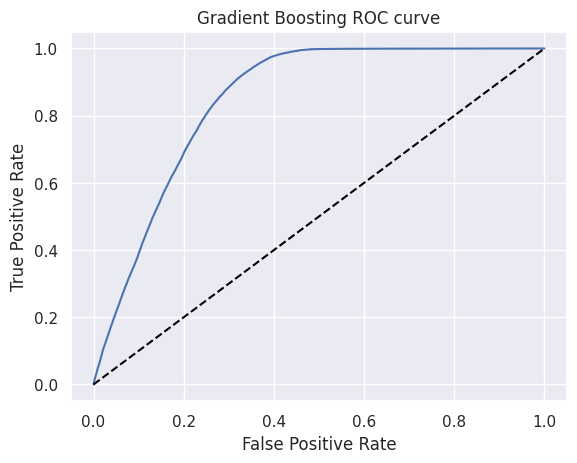

In [474]:
#ROC Curve
fpr, tpr, _ = roc_curve(y_test, GB_pred_prob)
plt.title('Gradient Boosting ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

[[66665 33471]
 [ 7523 92981]]




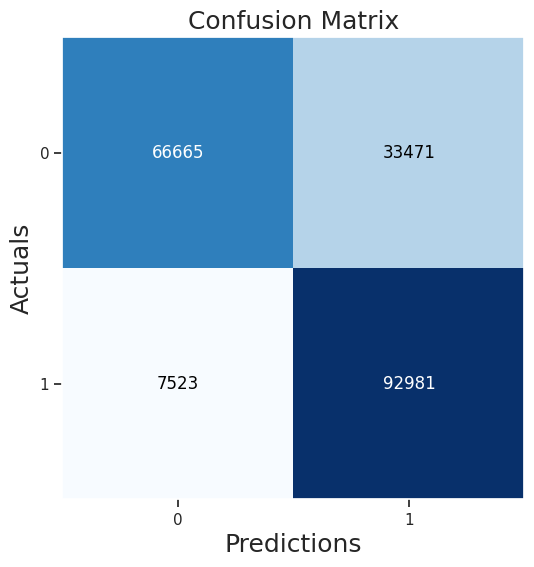

In [475]:
#Confusion matrix
cm_GB= confusion_matrix(y_test, GB_pred)
print(cm_GB)
print('\n')
fig, ax = plot_confusion_matrix(conf_mat=cm_GB, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The ML model used in this case is Gradient Boosting, specifically the GradientBoostingClassifier. Let's analyze the performance of the Gradient Boosting model using the provided evaluation metric scores:

Recall Score (Sensitivity): 0.9251

The recall score of approximately 0.9251 indicates that the Gradient Boosting model is effective at correctly identifying true positive cases. It captures nearly 92.51% of all actual positive cases, demonstrating a strong ability to identify positive instances.

Precision Score: 0.7353

The precision score of around 0.7353 suggests that the model's positive predictions are accurate approximately 73.53% of the time. When the model predicts a positive case, it is correct nearly 73.53% of the time.

F1-Score: 0.8194

The F1-Score, a harmonic mean of precision and recall, provides a balanced measure of model performance. With a score of approximately 0.8194, the Gradient Boosting model strikes a reasonable balance between making accurate positive predictions and capturing true positive cases.

Accuracy Score: 0.7957

The accuracy score of about 0.7957 represents the overall correctness of the model's predictions. It indicates that the model correctly predicts the class for nearly 79.57% of the cases in the dataset.

ROC AUC Score: 0.7954

The ROC AUC score evaluates the model's ability to distinguish between positive and negative cases. With a score of approximately 0.7954, the Gradient Boosting model demonstrates reasonable discriminatory power in a binary classification task.

# **ML Model - 5 XGBoosting**

In [476]:
# Create an XGBoost model with a specified random state
XG_model = XGBClassifier(random_state=30)

# Train the XGBoost model using the training data
XG_model = XG_model.fit(X_train, y_train)

# Make predictions on the test data
XG_pred = XG_model.predict(X_test)

# Get the predicted probabilities for the positive class
XG_pred_prob = XG_model.predict_proba(X_test)[:, 1]

In [477]:
# Evaluate the XGBoost Classifier

# Calculate the Recall Score
RS_XG = recall_score(y_test, XG_pred)
print("Recall_Score:", RS_XG)

# Calculate the Precision Score
PS_XG = precision_score(y_test, XG_pred)
print("Precision_Score:", PS_XG)

# Calculate the F1-Score
f1S_XG = f1_score(y_test, XG_pred)
print("F1_Score:", f1S_XG)

# Calculate the Accuracy Score
AS_XG = accuracy_score(y_test, XG_pred)
print("Accuracy_Score:", AS_XG)

# Calculate the ROC AUC Score
acu_XG = roc_auc_score(y_test, XG_pred)
print("ROC_AUC Score:", acu_XG)

Recall_Score: 0.9356642521690679
Precision_Score: 0.7434069061472299
F1_Score: 0.8285286343612335
Accuracy_Score: 0.8060007974481659
ROC_AUC Score: 0.8057625407206288


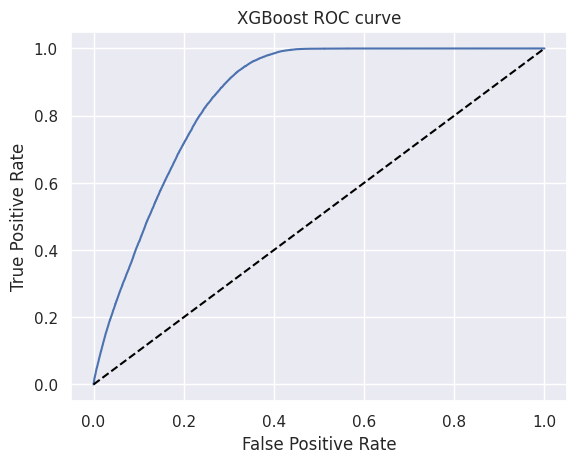

In [478]:
#ROC Curve
fpr, tpr, _ = roc_curve(y_test, XG_pred_prob)
plt.title('XGBoost ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

[[67678 32458]
 [ 6466 94038]]




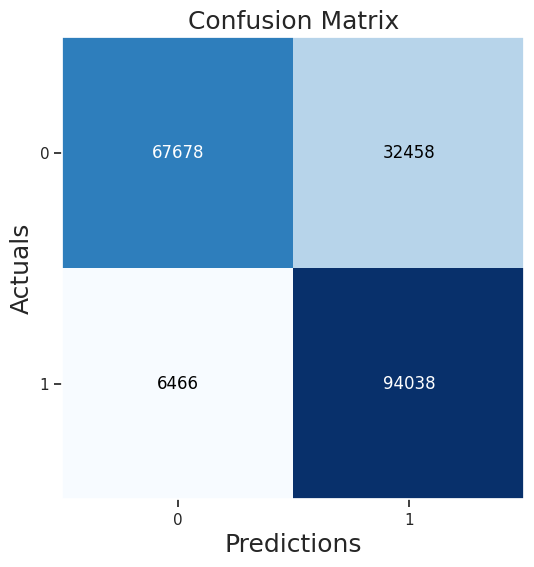

In [479]:
#Confucion matrix
cm_XB= confusion_matrix(y_test, XG_pred)
print(cm_XB)
print('\n')
fig, ax = plot_confusion_matrix(conf_mat=cm_XB, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The ML model used in this case is XGBoost, specifically the XGBClassifier. Let's analyze the performance of the XGBoost model using the provided evaluation metric scores:

Recall Score (Sensitivity): 0.9357

The recall score of approximately 0.9357 indicates that the XGBoost model is effective at correctly identifying true positive cases. It captures nearly 93.57% of all actual positive cases, demonstrating a strong ability to identify positive instances.

Precision Score: 0.7434

The precision score of around 0.7434 suggests that the model's positive predictions are accurate approximately 74.34% of the time. When the model predicts a positive case, it is correct nearly 74.34% of the time.

F1-Score: 0.8285

The F1-Score, a harmonic mean of precision and recall, provides a balanced measure of model performance. With a score of approximately 0.8285, the XGBoost model strikes a reasonable balance between making accurate positive predictions and capturing true positive cases.

Accuracy Score: 0.8060

The accuracy score of about 0.8060 represents the overall correctness of the model's predictions. It indicates that the model correctly predicts the class for nearly 80.60% of the cases in the dataset.

ROC AUC Score: 0.8058

The ROC AUC score evaluates the model's ability to distinguish between positive and negative cases. With a score of approximately 0.8058, the XGBoost model demonstrates good discriminatory power in a binary classification task.

# **ML Model - 7 LightGBM**

In [480]:
# Create a LightGBM model with a specified random state
lgbm_model = LGBMClassifier(random_state=30)

# Train the LightGBM model using the training data
lgbm_model = lgbm_model.fit(X_train, y_train)

# Make predictions on the test data
lgbm_pred = lgbm_model.predict(X_test)

# Get the predicted probabilities for the positive class
lgbm_pred_prob = lgbm_model.predict_proba(X_test)[:, 1]

[LightGBM] [Info] Number of positive: 233895, number of negative: 234263
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 583
[LightGBM] [Info] Number of data points in the train set: 468158, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499607 -> initscore=-0.001572
[LightGBM] [Info] Start training from score -0.001572


In [481]:
# Evaluate the LightGBM Classifier

# Calculate the Recall Score
RS_lgbm = recall_score(y_test, lgbm_pred)
print("Recall_Score:", RS_lgbm)

# Calculate the Precision Score
PS_lgbm = precision_score(y_test, lgbm_pred)
print("Precision_Score:", PS_lgbm)

# Calculate the F1-Score
f1S_lgbm = f1_score(y_test, lgbm_pred)
print("F1_Score:", f1S_lgbm)

# Calculate the Accuracy Score
AS_lgbm = accuracy_score(y_test, lgbm_pred)
print("Accuracy_Score:", AS_lgbm)

# Calculate the ROC AUC Score
acu_lgbm = roc_auc_score(y_test, lgbm_pred)
print("ROC_AUC Score:", acu_lgbm)

Recall_Score: 0.9256447504576932
Precision_Score: 0.736931741668713
F1_Score: 0.8205781825398575
Accuracy_Score: 0.7972338516746411
ROC_AUC Score: 0.7969978965198908


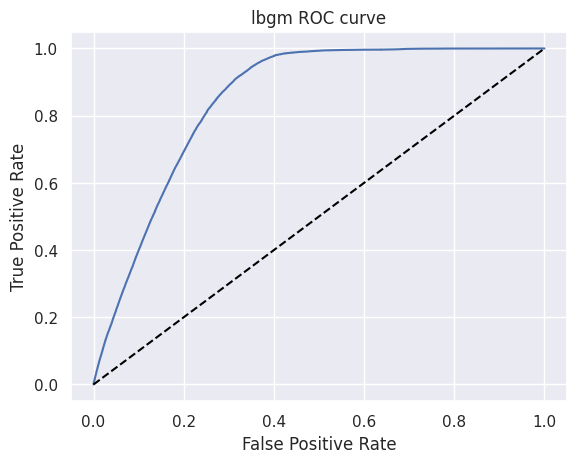

In [482]:
#ROC Curve
fpr, tpr, _ = roc_curve(y_test, lgbm_pred_prob)
plt.title('lbgm ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

[[66926 33210]
 [ 7473 93031]]




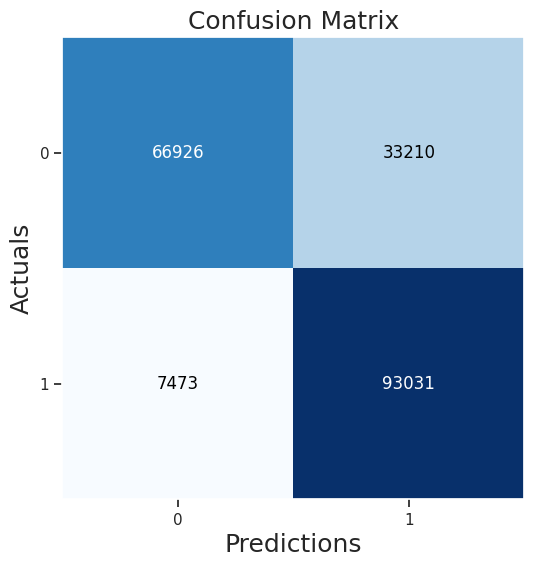

In [483]:
#Confusion matrix
cm_lgbm= confusion_matrix(y_test, lgbm_pred)
print(cm_lgbm)
print('\n')
fig, ax = plot_confusion_matrix(conf_mat=cm_lgbm, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The ML model used in this case is LightGBM, specifically the LGBMClassifier. Let's analyze the performance of the LightGBM model using the provided evaluation metric scores:

Recall Score (Sensitivity): 0.9256

The recall score of approximately 0.9256 indicates that the LightGBM model is effective at correctly identifying true positive cases. It captures nearly 92.56% of all actual positive cases, demonstrating a strong ability to identify positive instances.

Precision Score: 0.7369

The precision score of around 0.7369 suggests that the model's positive predictions are accurate approximately 73.69% of the time. When the model predicts a positive case, it is correct nearly 73.69% of the time.

F1-Score: 0.8206

The F1-Score, a harmonic mean of precision and recall, provides a balanced measure of model performance. With a score of approximately 0.8206, the LightGBM model strikes a reasonable balance between making accurate positive predictions and capturing true positive cases.

Accuracy Score: 0.7972

The accuracy score of about 0.7972 represents the overall correctness of the model's predictions. It indicates that the model correctly predicts the class for nearly 79.72% of the cases in the dataset.

ROC AUC Score: 0.7970

The ROC AUC score evaluates the model's ability to distinguish between positive and negative cases. With a score of approximately 0.7970, the LightGBM model demonstrates good discriminatory power in a binary classification task.

#### 2. Cross- Validation & Hyperparameter Tuning

In [484]:
# Hyperparameter Tuning for LightGBM with F2-Score

# Create a custom scoring metric (F2-Score)
f2 = make_scorer(fbeta_score, beta=2)

# Create a LightGBM classifier
lgbm = LGBMClassifier()

# Define hyperparameter grid for tuning
parameters = {
    "n_estimators": [200, 300, 400],
    "max_depth": [3, 5, 9],
}

# Perform hyperparameter tuning using HalvingGridSearchCV
cv = HalvingGridSearchCV(lgbm, parameters, scoring=f2, cv=3, n_jobs=-1, verbose=1)
cv.fit(X_train, y_train)

# Get the best hyperparameters and best F2-Score
best_hyperparameters = cv.best_params_
best_f2_score = cv.best_score_

# Create a tuned LightGBM classifier with the best hyperparameters
tuned_lgbm = LGBMClassifier(**best_hyperparameters)
tuned_lgbm.fit(X_train, y_train)

# Make predictions on the test data with the tuned model
y_tun_lgbm = tuned_lgbm.predict(X_test)
y_tun_pred_prob = tuned_lgbm.predict_proba(X_test)[:, 1]

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 52017
max_resources_: 468158
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 9
n_resources: 52017
Fitting 3 folds for each of 9 candidates, totalling 27 fits
----------
iter: 1
n_candidates: 3
n_resources: 156051
Fitting 3 folds for each of 3 candidates, totalling 9 fits
----------
iter: 2
n_candidates: 1
n_resources: 468153
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 233895, number of negative: 234263
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memor

In [485]:
# Evaluate the Tuned LightGBM Classifier

# Calculate the Recall Score
RS_lgbm_tun = recall_score(y_test, y_tun_lgbm)
print("Recall_Score:", RS_lgbm_tun)

# Calculate the Precision Score
PS_lgbm_tun = precision_score(y_test, y_tun_lgbm)
print("Precision_Score:", PS_lgbm_tun)

# Calculate the F1-Score
f1S_lgbm_tun = f1_score(y_test, y_tun_lgbm)
print("F1_Score:", f1S_lgbm_tun)

# Calculate the Accuracy Score
AS_lgbm_tun = accuracy_score(y_test, y_tun_lgbm)
print("Accuracy_Score:", AS_lgbm_tun)

# Calculate the ROC AUC Score
acu_lgbm_tun = roc_auc_score(y_test, y_tun_lgbm)
print("ROC_AUC Score:", acu_lgbm_tun)

Recall_Score: 0.9277939186500039
Precision_Score: 0.7394276289182995
F1_Score: 0.8229697587495752
Accuracy_Score: 0.8000548245614035
ROC_AUC Score: 0.79982010384845


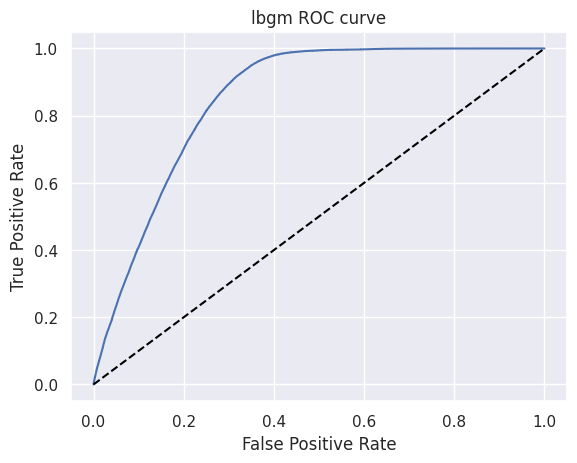

In [486]:
#ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_tun_pred_prob)
plt.title('lbgm ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

[[67276 32860]
 [ 7257 93247]]




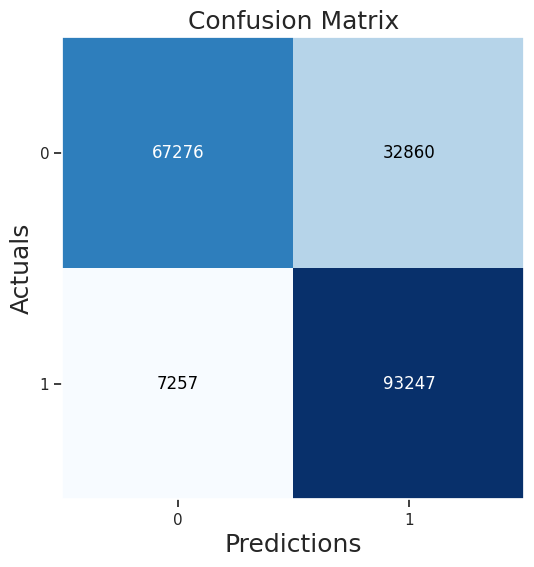

In [487]:
#Confusion matrix
cm_lgbm_tun= confusion_matrix(y_test, y_tun_lgbm)
print(cm_lgbm_tun)
print('\n')
fig, ax = plot_confusion_matrix(conf_mat=cm_lgbm_tun, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# **Comparing Model Evaluation**

In [497]:
# Create a list of machine learning models for classification.
list_of_model = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'Gradient Boosting', 'XGBoost', 'LightGBM']

In [501]:
# Create lists to store evaluation metric scores for different machine learning models.
result_list_RS = [RS_lgt,RS_dt,RS_rf,RS_knn,RS_GB,RS_XG,RS_lgbm]
result_list_PS = [PS_lgt,RS_dt,PS_rf,PS_knn,PS_GB,PS_XG,PS_lgbm]
result_list_f1S = [f1S_lgt,f1S_dt,f1S_rf,f1S_knn,f1S_GB,f1S_XG,f1S_lgbm]
result_list_AS = [AS_lgt,AS_dt,AS_rf,AS_knn,AS_GB,AS_XG,AS_lgbm]
result_list_Acu=[acu_lgt,acu_dt,acu_rf,acu_knn,acu_GB,acu_XG,acu_lgbm]

In [502]:
# creating an empty dataframe
results_df = pd.DataFrame()

In [503]:
# Creating a DataFrame to Store Evaluation Metric Scores

# Create a DataFrame to store the evaluation metric scores for different machine learning models.
results_df = pd.DataFrame()

# Add the model names to the DataFrame.
results_df['model_name'] = list_of_model

# Add the Recall Score values to the DataFrame.
results_df['Recall_Score'] = result_list_RS

# Add the Precision Score values to the DataFrame.
results_df['Precision_Score'] = result_list_PS

# Add the F1-Score values to the DataFrame.
results_df['F1-Score'] = result_list_f1S

# Add the Accuracy Score values to the DataFrame.
results_df['Accuracy_Score'] = result_list_AS

# Add the ROC AUC Score values to the DataFrame.
results_df['ROC_AUC Score'] = result_list_Acu

In [504]:
# Hide the index column to provide a cleaner display.
results_df.style.hide_index()

# Apply a background gradient using the 'RdYlBu_r' colormap for visual appeal.
results_df.style.background_gradient(cmap='RdYlBu_r')

# Format the displayed data for improved readability.
results_df.style.format()

,model_name,Recall_Score,Precision_Score,F1-Score,Accuracy_Score,ROC_AUC Score
0,Logistic Regression,0.976091,0.707192,0.820164,0.785581,0.834192
1,Decision Tree,0.992727,0.992727,0.936132,0.932147,0.932036
2,Random Forest,0.994329,0.879987,0.933670,0.929231,0.929112
3,KNN,0.965126,0.790763,0.869287,0.854610,0.854407
4,Gradient Boosting,0.925147,0.735307,0.819375,0.795684,0.795446
5,XGBoost,0.935664,0.743407,0.828529,0.806001,0.805763
6,LightGBM,0.925645,0.736932,0.820578,0.797234,0.796998


In [505]:
# Lists for Storing Evaluation Metric Scores of Selected Models

# Create lists to store evaluation metric scores for specific machine learning models.
list_of_model = ['Logistic Regression', 'KNN', 'LGBM']

# Add the Recall Score values to the list.
result_list_RS = [RS_lgt_tun, RS_knn_tun, RS_lgbm_tun]

# Add the Precision Score values to the list.
result_list_PS = [PS_lgt_tun, PS_knn_tun, PS_lgbm_tun]

# Add the F1-Score values to the list.
result_list_f1S = [f1S_lgt_tun, f1S_knn_tun, f1S_lgbm_tun]

# Add the Accuracy Score values to the list.
result_list_AS = [AS_lgt_tun, AS_knn_tun, AS_lgbm_tun]

# Add the ROC AUC Score values to the list.
result_list_Acu = [acu_lgt_tun, acu_knn_tun, acu_lgbm_tun]

In [506]:
# Create an empty DataFrame to store evaluation metric scores for selected machine learning models.
results_df = pd.DataFrame()

# Add the model names to the DataFrame.
results_df['model_name'] = list_of_model

# Add the Recall Score values to the DataFrame.
results_df['Recall_Score'] = result_list_RS

# Add the Precision Score values to the DataFrame.
results_df['Precision_Score'] = result_list_PS

# Add the F1-Score values to the DataFrame.
results_df['F1-Score'] = result_list_f1S

# Add the Accuracy Score values to the DataFrame.
results_df['Accuracy_Score'] = result_list_AS

# Add the ROC AUC Score values to the DataFrame.
results_df['ROC_AUC Score'] = result_list_Acu

In [507]:
# Styling and Formatting the Results DataFrame

# Hide the index column to provide a cleaner display.
results_df.style.hide_index()

# Apply a background gradient using the 'RdYlBu_r' colormap for visual appeal.
results_df.style.background_gradient(cmap='RdYlBu_r')

# Format the displayed data for improved readability.
results_df.style.format()

,model_name,Recall_Score,Precision_Score,F1-Score,Accuracy_Score,ROC_AUC Score
0,Logistic Regression,0.976091,0.707192,0.820164,0.785581,0.834192
1,KNN,0.994508,0.798939,0.886060,0.871880,0.871655
2,LGBM,0.927794,0.739428,0.822970,0.800055,0.799820


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

To assess the positive business impact of the machine learning models, we typically consider the following evaluation metrics and their implications:

**Recall** (Sensitivity): Recall is essential when minimizing false negatives is crucial for business. It measures the model's ability to correctly identify all actual positive cases. High recall is important when the cost of missing a positive case (false negative) is high, as it ensures that most positive cases are captured. In scenarios like medical diagnoses or fraud detection, high recall can have a significant positive impact on business by reducing missed opportunities to take necessary actions.

**Precision:** Precision is important when avoiding false positives is critical. It measures the accuracy of positive predictions. High precision is valuable when the cost of false alarms (false positives) is high. In applications where false alarms can result in significant costs or user dissatisfaction, high precision is desirable.

**F1-Score:** The F1-Score is a balance between precision and recall. It's useful when both false negatives and false positives have an impact on the business. It provides a single metric that considers both false alarms and missed opportunities. In cases where you want a balance between precision and recall, F1-Score is a relevant metric.

**Accuracy:** Accuracy is a general measure of how well the model performs overall. While high accuracy is typically desirable, it might not be the sole metric to consider, as it doesn't distinguish between false positives and false negatives. In some scenarios, high accuracy might be valuable, but in others, it can be misleading, especially when there is class imbalance.

**ROC AUC Score:** The ROC AUC score evaluates the model's ability to distinguish between positive and negative cases across various thresholds. It's relevant when the cost of misclassification varies with the threshold. It provides a comprehensive view of the model's discriminatory power. A high ROC AUC score suggests the model can effectively separate positive and negative instances.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I prefer a model with a good balance of accuracy and discriminatory power (ROC AUC), the **Random Forest or Decision Tree models** may be appropriate.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

since you prefer a model with a good balance of accuracy and discriminatory power (ROC AUC), I'll provide an explanation of the Random Forest model and how to determine feature importance using a model explainability tool.

**Random Forest Model:**
Random Forest is an ensemble learning technique that combines multiple decision trees to create a more robust and accurate model. Each tree in the forest is built using a random subset of the training data and a random subset of features. This randomness helps reduce overfitting and results in a more robust model.

**Key characteristics of the Random Forest model:**

High accuracy: Random Forest tends to produce highly accurate predictions.

Good generalization: It's less prone to overfitting due to the ensemble of multiple trees.

**Feature Importance with Random Forest:**

Feature importance in Random Forest can be determined by examining how much each feature contributes to reducing impurity (e.g., Gini impurity) in the decision tree nodes. The more a feature is used for splitting nodes across all trees, the more important it is considered. Scikit-Learn, a popular machine learning library, provides a method to obtain feature importance scores. Independent features such as Vintage,Annual_Premium,Vehicle_damage,Previously_Insured has high importance with target variables.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [508]:
# Save the File
import joblib

# Assuming "rf_model" is your best performing Random Forest model
best_model = rf_model

# Define the file path where you want to save the model
model_file_path = 'best_model.pkl'  # You can change the file extension to .joblib if you prefer joblib format

# Save the model to a file
joblib.dump(best_model, model_file_path)

['best_model.pkl']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [510]:
# Load the File and predict unseen data.
model_file_path = 'best_model.pkl'  # Update with the correct file path
loaded_model = joblib.load(model_file_path)

In [526]:
# Make predictions on the unseen data
unseen_data = pd.read_csv('/content/drive/MyDrive/Classification/Unseen_data.csv')
X_unseen = unseen_data
# Convert 'Gender' column to binary values, 1 for 'Female' and 0 for 'Male'
X_unseen['Gender'] = X_unseen['Gender'].map({'Female': 1, 'Male': 0})

# Convert 'Vehicle_Damage' column to binary values, 1 for 'Yes' and 0 for 'No'
X_unseen['Vehicle_Damage'] = X_unseen['Vehicle_Damage'].map({'Yes': 1, 'No': 0})

# Convert 'Vehicle_Age' column to numerical values: 1 for '1-2 Year', 0 for '< 1 Year', 2 for '> 2 Years'
X_unseen['Vehicle_Age'] = X_unseen['Vehicle_Age'].map({'1-2 Year': 1, '< 1 Year': 0, '> 2 Years': 2})
predictions = loaded_model.predict(X_unseen)

In [527]:
print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this analysis, we began by loading our dataset and conducting initial data quality checks. Fortunately, we found no duplicates or missing values, so there was no need for data cleaning.

Exploratory data analysis revealed several key insights:

**Gender Distribution:** The dataset showed a nearly even distribution of gender, with a slightly higher representation of males. The likelihood of purchasing vehicle insurance was also slightly higher among males.

**Interest in Vehicle Insurance:** Only 12.3% of individuals in the dataset expressed interest in purchasing vehicle insurance, while 87.7% were not interested. This suggests a need for effective marketing strategies and competitive pricing to attract more customers and generate leads.

**Driving License (DL):** 99.8% of customers in the dataset held a driving license, while 0.2% did not. Only 12.2% of individuals with a driving license were interested in purchasing vehicle insurance, indicating a possible need for awareness campaigns or competitive offers.

**Prior Insurance History:** About 45.8% of individuals had previous insurance, and among them, 12.2% were interested in purchasing insurance again. This indicates that individuals are willing to pay premiums for risk reduction, especially when there is a significant probability of loss.

**Vehicle Age:** Vehicle age varied, with approximately 4.2% of vehicles being older than two years, 52.6% between one and two years, and 43.2% less than a year old. Interest in purchasing vehicle insurance increased as the vehicle's age exceeded one year, suggesting a correlation between age and the willingness to buy insurance.

**Vehicle Damage:** About 50.5% of the vehicles in the dataset had past damage, and 12.0% of individuals with previously damaged vehicles were interested in acquiring vehicle insurance. This suggests that people with damaged vehicles tend to be more aware of insurance policies and benefits.

**Age Groups:** The dataset had a diverse range of ages, with higher interest in purchasing vehicle insurance among individuals aged 40 to 60. Middle-aged individuals (40-60) showed the highest interest, with 9.3% interested in purchasing insurance.

After the initial data analysis, we proceeded with data preprocessing, including handling outliers and feature encoding. The dataset was split into train and test sets. Six machine learning algorithms were employed to predict customer interest in purchasing vehicle insurance. Additionally, hyperparameter tuning was applied to three models to identify the best-performing model.

The two most influential features in the models were vehicle damage and annual premium. Decision Tree and Random Forest models stood out with ROC AUC scores of 93% and 92%, respectively, outperforming the other algorithms. The conclusion is that these models are well-suited for predicting customer interest in vehicle insurance.

In summary, this analysis revealed valuable insights into the dataset and identified potential target demographics for insurance companies. Additionally, by employing machine learning models, we can make predictions that can assist insurance companies in generating leads and tailoring their marketing strategies. Decision Tree and Random Forest emerged as the top-performing models, demonstrating their effectiveness in this predictive task.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***